In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tabulate import tabulate
import seaborn as sns
import scikitplot as skplt
from numpy import percentile
import math
from numpy import arange
import IPython.display as ipd
import matplotlib.lines as mlines

#pandas
from pandas.plotting import parallel_coordinates
import datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#scikitplot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain

#tslearn
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

#mlxtend
from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski
from scipy.spatial.distance import cdist

#matrixprofile
import matrixprofile
from matrixprofile import *
from matrixprofile.discords import discords

In [2]:
def plot_time_series_years(column, legend_item, color, together, df, columns, period_type):
    if not together and column != "" and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        ts = df[column]
        plt.plot(ts, color = color)
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = df[columns[0]]  #Studio_Recording
        ts2 = df[columns[1]]  #Live_Recording
        plt.plot(ts1, color = '#ea0064')
        plt.plot(ts2, color = '#b329ff')
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [3]:
def plot_other_time_series(ts1, ts2, together, columns, period_type):
    
    if not together:
        time_series = [ts1, ts2]
        colors = ['#ea0064', '#b329ff']
        for ts, color, column in zip(time_series, colors, columns):
            fig, ax = plt.subplots(figsize=(8, 5))
            legend_item = column.replace(("_"+period_type+"_freq"), "").replace("_", " ")
            plt.plot(ts.values, color = color)
            plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
            plt.grid()
            plt.legend([legend_item], title="Album type")
            plt.ylabel("count")
            plt.title(column + " TS")
            
            if period_type == 'month':
                ax.xaxis.set_major_locator(MultipleLocator(20))
                ax.xaxis.set_minor_locator(MultipleLocator(10))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            if period_type == 'week':
                ax.xaxis.set_major_locator(MultipleLocator(100))
                ax.xaxis.set_minor_locator(MultipleLocator(50))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
        
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
   
        plt.show()

In [4]:
def plot_other_time_series2(ts, column, ts1, ts2, legend_item, color, together, columns, period_type):
    
    if not ts1 and not ts2 and not together and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        plt.plot(ts.values, color = color)
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [5]:
#Transformations
def offset_translation(ts):
    return ts - ts.mean()

def amplitude_scaling(ts):
    return (ts - ts.mean())/ts.std()

def noise(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window=1).mean()

def trend_removal(ts):
    return ts - ts.rolling(window=2).mean()

#Get Transformations
def get_transformation(ts):
    transformations = list()
    
    t = offset_translation(ts)
    transformations.append(t)
    
    t = amplitude_scaling(ts)
    transformations.append(t)
    
    t = noise(ts)
    transformations.append(t)
    
    t = trend_removal(ts)
    transformations.append(t)

    return transformations

In [6]:
distances = [euclidean, cityblock, cosine, minkowski]
transformation_names = ['offset_translation', 'amplitude_scaling', 'noise', 'trend_removal']

In [7]:
indexes = [((i.__name__) + '_distance').title() for i in distances]

In [8]:
def plot_distances_dataframes_normal_global_constraints(ts1, ts2, columns, year_period):
    
    df_temp = pd.DataFrame(index = indexes)
    df_temp.index.name = (columns[0] + " - " + columns[1]).title()
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    for i, distance in enumerate(distances):

        #key for each distance
        key = indexes[i]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp.loc[key, 'No_transformation'] = distance(ts1, ts2)

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            
    ipd.display(df_temp)

In [9]:
def plot_distances_dataframes_normal_global_constraints2(ts1, ts2, columns):
    for distance in distances:

        #key for each distance
        key = [(columns[0] + " - " + columns[1] + " " + (distance.__name__) + '_distance ').title()]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp = pd.DataFrame({'No_transformation': distance(ts1, ts2)}, index = (key))

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            df_temp.index.name = ((distance.__name__) + '_distance ').title()

        ipd.display(df_temp)

In [10]:
def plot_translation_plot(ts1, ts2, columns, year_period, period_type):
    
    if not year_period:
        ts1 = pd.Series(ts1.values)
        ts2 = pd.Series(ts2.values)
        
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

            
    for i, (a,b,c) in enumerate(ts_temps):
        
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(ts_temps[i][0], color = '#ea0064')
        ax.plot(ts_temps[i][1], color = '#b329ff')  
        
        if year_period:
            if c != 'trend_removal':
                ax.xaxis.set_major_locator(MultipleLocator(2))
                ax.xaxis.set_minor_locator(MultipleLocator(1))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')

        plt.title(columns[0] + " - " + columns[1] + "\n" + ts_temps[i][2].title())
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.grid()
        plt.show()

In [11]:
def plot_translation_plot2(ts1, ts2, columns):
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

    for i, (a,b,c) in enumerate(ts_temps):
        plt.plot(ts_temps[i][0])
        plt.plot(ts_temps[i][1])    
        plt.title(columns[0] + " - " + columns[1] + " " + ts_temps[i][2].title())
        plt.grid()
        plt.show()

In [12]:
def plot_point_to_point_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1)) 

    if year_period:
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.imshow(mat, cmap = "RdPu")
        ax.axis("off")
        ax.autoscale(False)
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = ax.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

        plt.title(columns[0] + " - " + columns[1] + "\n" + "Point to Point Matrix")        
        plt.show()
    
    return mat

In [13]:
def plot_cumulative_cost_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(acc, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            text = ax.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")

    plt.title(columns[0] + " - " + columns[1] + "\n" + "Cumulative Cost Matrix")   
    plt.show()

In [14]:
#-------------------------------------------Calculates DTW path---------------------------------------------#
def calculate_dtw_path(ts1, ts2, flag):
    
    if flag == 'normal':
        path, dist = dtw_path(ts1, ts2)
    elif flag == 'sakoe_chiba':
        path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
    else:
        path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
        
    return path, dist


#-------------------------------------------Plots optimal path---------------------------------------------#
def plot_optimal_path(mat, path, flag, columns):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.imshow(mat, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    ax.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
    if flag == 'normal':
        title = columns[0] + " - " + columns[1] + "\n" + "Optimal Path"
    else:
        title = columns[0] + " - " + columns[1] + "\n" + flag.title() + " global constraint's Optimal Path"
    plt.title(title)
    plt.show()
    
    
#--------------------------------------Calculates and plots optimal path-----------------------------------#
def calculate_and_plot_optimal_paths(mat, ts1, ts2, columns, year_period):
    
    year_period = year_period
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    flag_list = ['normal', 'sakoe_chiba', 'itakura']

    for i in flag_list:

        path, dist = calculate_dtw_path(ts1, ts2, i)

        print("%s Dist: %d" % (i.title(), dist))
        if year_period:
            print("%s Path:\n" %(i.title()), path)

        print()

        plot_optimal_path(mat, path, i, columns)
        print()


<h2>MatrixProfile</h2>

In [15]:
def matrixProfile_stomp(ts, w, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    mp, mpi = matrixProfile.stomp(ts.values, w)
    
    ax.plot(mp, color = color)
    plt.title(column + "'s Matrix Profile (w = %d)" % (w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.show()
    
    return mp, mpi

<h2>Motif Discovery</h2>

In [16]:
def plot_motifs(ts, mo, mod, max_motifs, column, w, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    colors = ['c', 'g', 'k', 'b', 'y'][:len(mo)]
    lista_generale2 = []
    legend = [legend_item]
    
    for n, m, d, c in zip(range(0, len(mo)), mo, mod, colors):
        
        lista_provvisoria2 = []
        
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)
            
            if i in li[0].get_data()[0]:
                lista_provvisoria2.append(ts.index[i])
            
        lista_generale2.append(lista_provvisoria2)
        legend.append(lista_provvisoria2)
        
        print ("- Motif "+str(n)+": ", *lista_provvisoria2, sep = " | ")
        print()
    
    
    bbox_to_anchor = ""
    if period_type == 'week' or period_type == 'weekday' or period_type == 'daymoment':
        bbox_to_anchor = (0.0,-0.1)
    else:
        bbox_to_anchor = (1.05, 1)
    
    plt.legend(legend, title="Album type - Motifs", bbox_to_anchor=bbox_to_anchor, loc='upper left')
    leg = ax.get_legend()
    for num, motif, color in zip(range(1, len(mo)+1), mo, colors):
        leg.legendHandles[num].set_color(color)
        
    
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Motifs translated: ", lista_generale2)
    #print()
            

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()    
    plt.ylabel("count")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()

<h2>Anomaly Discovery</h2>

In [17]:
def plot_anomalies(ts, w, anoms, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.grid()
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['c', 'g', 'k', 'b', 'y'][:len(anoms)]
    
    for a, c in zip(anoms, colors):
        
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)
        
    
    lista_generale2 = []
    
    for n, i in enumerate(anoms):
        if i in li[0].get_data()[0]:       
            lista_generale2.append(ts.index[i])
       
    print ("- Anomalies: ", *lista_generale2, sep = " | ")
    print()
   
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Anomalies translated: ", lista_generale2)
    #print()
    
    legend = [legend_item]
    for i in lista_generale2:
        legend.append(i)

    plt.legend(legend, title="Album type - Anomalies", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

<h2>Matrix Profile - Motifs - Discords</h2>

In [18]:
def matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type):
        
    fig, ax = plt.subplots(figsize=(8, 5))
    Discords = ""
    li = ax.plot(mp, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
        
    star = ""
    color_star = ""
    
    if column == columns[0]:
        color_star = '#206bff'
    else:
        color_star = '#fb7300'
        
    star = mlines.Line2D([], [], color=color_star, marker='*', markersize=10, label='Discords')
        
    for a, b in zip(li[0].get_data()[0], li[0].get_data()[1]):
        if a in anoms:
            Discords, = plt.plot(a, b, marker='*', c=color_star, markersize = 10)

    plt.title(column + "'s Matrix Profile with discords (w = %d)" % (w))
    plt.grid()
    plt.legend(handles=[star])
    plt.show()

In [19]:
def plot_matrixProfile_motifs_discords(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item, period_type)

            #Motifs
            mo, mod = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)
            print("Motifs ({}): {}".format(len(mo), mo))
            print()
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item, period_type)
            print()
            print()

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            print("Anomalies ({}): {}".format(len(anoms), anoms))
            print()
            
            plot_anomalies(ts, w, anoms, column, color, legend_item, period_type)
            print()
            
            #Matrix Profile with discords
            print("Anomalies:", anoms)
            
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type)
            
            print()
            print("---------------------------------------------------------------------------------------------")
        
        print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")

<h3>Old functions</h3>

In [20]:
def plot_motifs_no(ts, mo, mod, max_motifs, column, w, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    plt.plot(ts.values, color = color)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()
    
    #fig, ax = plt.subplots(figsize=(8, 5))
    
    #Single motifs
    #for m, d, c in zip(mo, mod, colors):
    #    for i in m:
    #        m_shape = ts.values[i:i+w]
    #        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    #        plt.title(column + "\nSingle Motif (w = %d)" %(w))
    #    plt.grid()
    #    plt.show()

In [21]:
def plot_anomalies_no(ts, mo, w, anoms, column, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    plt.plot(ts, color = color)
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for a, c in zip(anoms, colors):
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)

    plt.show()

In [22]:
def plot_matrixProfile_motifs_discords_no(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item)

            #Motifs
            mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)
            print("Motifs: ", mo)
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item)

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            plot_anomalies(ts, mo, w, anoms, column, color, legend_item)
            print("Anomalies:", anoms)
            
            #Matrix Profile with discords
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, legend_item)
        print("------------------------------------------------------------")

In [23]:
def get_Studio_and_Live_Recording_cols(df):
    
    col_studio = [col for col in df if 'Studio_Recording' in col]
    col_live = [col for col in df if 'Live_Recording' in col]
    
    dataset_studio = df[col_studio]
    dataset_live = df[col_live]
    
    return dataset_studio, dataset_live

In [24]:
def get_time_series_month(df1, df2):
    
    ts_month_studio = []
    ts_month_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_month_studio, ts_month_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        ts = [i for i in ts if i != 0]
        ts.append(0)
        TSs_list.append(ts)
        
    ts_month_studio = TSs_list[0]
    ts_month_live = TSs_list[1]
        
    return ts_month_studio, ts_month_live

In [25]:
def get_time_series_other_types(df1, df2):
    
    ts_studio = []
    ts_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_studio, ts_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        #ts = [i for i in ts if i != 0]
        #ts.append(0)
        TSs_list.append(ts)
        
    ts_studio = TSs_list[0]
    ts_live = TSs_list[1]
        
    return ts_studio, ts_live

In [26]:
def get_cols_period_type(df):
    
    cols = []
    for string in df.columns.tolist():
        for char in string:
            if char.isdigit():
                string = string.replace(char, "")

        cols.append(string[0:len(string)-1] + "_freq")

    cols = sorted(list(set(cols)), reverse = True)
    
    return cols

<h1>Inizio file<h1>

In [27]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score as sil_ts
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import zlib
import string
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from tslearn.piecewise import PiecewiseAggregateApproximation
import numpy as np
import scipy.stats as stats

In [28]:
def find_optimal_k_kmeans(max_k, metric, X, other_measures, album_type):
    
    max_k = max_k
    
    sse_list = list()
    silhouette = list()
    
    if other_measures:
        calinski = list()
        bouldin = list()
        fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
        
    else:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

    for k in range(2, max_k + 1):
        
        kmeans = ""
        
        if not other_measures:
            kmeans = TimeSeriesKMeans(n_clusters = k, max_iter = 300, n_init = 10, metric = metric)
            
        else:
            kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300, algorithm='full')
            
        kmeans.fit(X)

        sse = kmeans.inertia_
        sse_list.append(sse)
        
        if not other_measures:
            sil = sil_ts(X, kmeans.labels_, metric = metric) #silhouette score di TimeSeriesKMeans
            
        else:
            sil = silhouette_score(X, kmeans.labels_)        #silhouette score di sklearn
            
        silhouette.append(sil)
        
        if other_measures:
            cal = calinski_harabasz_score(X, kmeans.labels_)
            calinski.append(cal)

            boul = davies_bouldin_score(X, kmeans.labels_)
            bouldin.append(boul)

        print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil)
        
        if other_measures:
            print("Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
            
        print()
    
    index = [i for i in range(2, max_k + 1)]
    
    if other_measures:
        ax[0, 0].plot(index, sse_list)
        ax[0, 0].set_ylabel('SSE', fontsize = 15)
        ax[0, 0].set_xlabel('K', fontsize = 15)
        ax[0, 0].set_title(album_type + ' SSE', fontsize = 18)

        ax[0, 1].plot(index, silhouette)
        ax[0, 1].set_ylabel('SIL', fontsize = 15)
        ax[0, 1].set_xlabel('K', fontsize = 15)
        ax[0, 1].set_title(album_type + '\nSilhouette Score', fontsize = 18)
        
        ax[1, 0].plot(index, calinski)
        ax[1, 0].set_ylabel('CAL', fontsize = 15)
        ax[1, 0].set_xlabel('K', fontsize = 15)
        ax[1, 0].set_title(album_type + '\nCalinski-Harabaz Score', fontsize = 18)

        ax[1, 1].plot(index, bouldin)
        ax[1, 1].set_ylabel('BOUL', fontsize = 15)
        ax[1, 1].set_xlabel('K', fontsize = 15)
        ax[1, 1].set_title(album_type + '\nDavies-Bouldin Score', fontsize = 18)
        
        plt.subplots_adjust(hspace=0.5)
        
    else:
        ax1.plot(index, sse_list)
        ax1.set_ylabel('SSE', fontsize = 15)
        ax1.set_xlabel('K', fontsize = 15)
        ax1.set_title(album_type + ' SSE', fontsize = 18)

        ax2.plot(index, silhouette)
        ax2.set_ylabel('SIL', fontsize = 15)
        ax2.set_xlabel('K', fontsize = 15)
        ax2.set_title(album_type + '\nSilhouette Score', fontsize = 18)
    
    #if ticks:
    #    for axis in ax.flat:
    #        axis.xaxis.set_major_locator(MultipleLocator(2))
    #        axis.xaxis.set_minor_locator(MultipleLocator(1))
    #        axis.tick_params(which='major', length=9)
    #        axis.tick_params(which='minor', length=7, color='r')

    plt.show()
    fig.tight_layout()

In [29]:
def run_kmeans(n_clusters, max_iter, n_init, metric, X, other_measures):
    
    kmeans = ""
    if not other_measures:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter = max_iter, n_init = n_init, metric = metric)
        
    else:
        kmeans = KMeans(n_clusters = n_clusters, n_init = n_init, max_iter = max_iter, algorithm='full')
        
    kmeans.fit(X)
    
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print ('cluster_centers_shape', kmeans.cluster_centers_.shape)
    print()
    
    print ('Labels: ', dict(zip(bins, hist)))
    print()
    
    print ('SSE: ', kmeans.inertia_)
    
    if not other_measures:
        print ('Silhouette Score: ', sil_ts(X, kmeans.labels_, metric = metric))  #silhouette score di TimeSeriesKMeans
        
    if other_measures:
        print ('Silhouette Score: ', silhouette_score(X, kmeans.labels_))  #silhouette score di sklearn
        print ("Calinski - Harabaz Score: ", calinski_harabasz_score(X, kmeans.labels_))
        print ("Davies - Bouldin Score: ", davies_bouldin_score(X, kmeans.labels_))
    
    return kmeans.cluster_centers_, dict(zip(bins, hist)), kmeans.labels_

In [30]:
def plot_kmeans_centroids(centers, album_type):
    
    fig, ax = plt.subplots()
    plt.plot(np.squeeze(centers).T)
    plt.title(album_type + ' centroids')
    
    plt.show()

In [31]:
def cluster_insight(df_to_copy, labels):
    
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    ipd.display(df)
    
    for i in np.unique(df['Labels']):
        print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
        print()

In [32]:
def analyze_clusters(labels, X, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))

    for i in range(len(np.unique(labels))):
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        for x in X[labels == i]:
            plt.plot(x, color='#de7100', linewidth=0.9)
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
    plt.tight_layout()
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [33]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    dbscan.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan.labels_[dbscan.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [34]:
def draw_scores(k, silhouette, separation, density, method, album_type):
    
    fig = plt.subplots(figsize=(20, 5))
    fig_dims = (1, 3)
    
    ax = plt.subplot2grid(fig_dims, (0, 0))
    ax.plot(k, silhouette)
    plt.xlabel('K')
    plt.ylabel('SIL')
    plt.title(album_type + ' Silhouette Score \n' + str(method) + "-linkage")
    
    ax = plt.subplot2grid(fig_dims, (0, 1))
    ax.plot(k, separation)
    plt.xlabel('K')
    plt.ylabel('SEP')
    plt.title(album_type + ' Separation Score \n' + str(method) + "-linkage")
    
    ax = plt.subplot2grid(fig_dims, (0, 2))
    ax.plot(k, density)
    plt.xlabel('K')
    plt.ylabel('VRC')
    plt.title(album_type + ' Variance Ratio Criterion Score \n' + str(method) + "-linkage")
    
    plt.show()

In [35]:
def interpret_dendrogram(max_k, method, X):
    
    k = list(range(2, max_k+1))
    silhouette = []
    separation = []
    density = []
    
    for i in k:
        complete = AgglomerativeClustering(n_clusters=i, linkage=method, affinity='euclidean', connectivity=None)
        complete.fit(X)
        hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
        
        print('Cluster numbers: ', i)
        print('Cluster', dict(zip(bins, hist)))
        print()
        
        print('Silhouette Score', silhouette_score(X, complete.labels_))
        silhouette.append(silhouette_score(X, complete.labels_))
        
        print('Separation Score', davies_bouldin_score(X, complete.labels_))
        separation.append(davies_bouldin_score(X, complete.labels_))
        
        print('Variance Ratio Criterion Score', calinski_harabasz_score(X, complete.labels_))
        density.append(calinski_harabasz_score(X, complete.labels_))
        
        print()
        print('-------------------------------------------------')
        print()

    draw_scores(k, silhouette, separation, density, method, album_type)

In [115]:
def plot_dendrogram(model, cut_distance, linkage_mode, album_type, **kwargs):
    """
        Function which creates the linkage matrix (proximity/similarity matrix),
        with which plots the cooresponding obtained dendrogram.
    """
    # children_ = children of each non-leaf node
    # N.B. A node i greater than or equal to n_samples is a non-leaf node 
    # and has children children_[i - n_samples], with n_samples = len(labels_)
    counts = np.zeros(model.children_.shape[0])  
    n_samples = len(model.labels_) # labels_ = cluster labels for each point
    
    # create the counts of samples under each node:
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    # add cut line according to silhouette score
    if cut_distance:
        plt.axhline(y=cut_distance, c='k', linestyle="--")
    
    plt.title(album_type + '\nHierarchical Clustering by ' + str(linkage_mode))
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')
    plt.show()

In [37]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        #'med': np.median(values),
        #'10p': np.percentile(values, 10),
        #'25p': np.percentile(values, 25),
        #'50p': np.percentile(values, 50),
        #'75p': np.percentile(values, 75),
        #'90p': np.percentile(values, 90),
        #'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        #'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }
    
    return features

In [38]:
def plot_mean_values(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nFeatures-based Clustering".format(album_type))
    
    plt.show()

In [39]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [40]:
def plot_centroids_approximated(centers, X, album_type):
    plt.plot(centers.reshape(X.shape[1], centers.shape[0]))
    plt.title(album_type + " centroids\nApproximated Clustering")
    plt.show()

In [41]:
def plot_mean_values_approximated(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nApproximated Clustering".format(album_type))
    
    plt.show()

<h2>Datasets Months</h2>

In [42]:
df_studio = pd.read_csv('df_week_studio.csv', index_col = 0)
df_live = pd.read_csv('df_week_live.csv', index_col = 0)
df_studio_live = pd.read_csv('df_week_studio_live.csv', index_col = 0)

<h1>Studio_Recording</h1>

In [43]:
album_type = "Studio_Recording_week"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [44]:
df_studio

1    2    3    4    5    6    7    8    9   10  ...  \
track_date_created                                                    ...   
2009_studio           2   34   25   36   34   21   16   48   60   85  ...   
2010_studio         183  412  161  149   91  297  254  169  184  288  ...   
2011_studio         345  132  263  253  118  157  318  333  331  117  ...   
2012_studio         212  627  111  159  199  379  189  196  341  197  ...   
2013_studio         448  531  299  126  157  272   84  112  350  261  ...   
2014_studio         212  254  129  139  149  233  324  128  292   57  ...   
2015_studio         150  150   92  136  216  359  290  223  208  148  ...   
2016_studio         434  294  264  246  259  222  348  436  387  150  ...   

                     44   45   46   47   48   49   50   51   52   53  
track_date_created                                                    
2009_studio         186  141  251   82  175  250  108  187   69  109  
2010_studio         427  222  193  256  303  324  254  289  146   44  
2011_studio         122  128  128  149  115  304   79  249  133    0  
2012_studio         141  144  119  227  281  162  219  232  244    0  
2013_studio         312  224  176  265  368  472  196  383   44    0  
2014_studio         218  117  182  258  196  254  169  383  166    0  
2015_studio         277  322  209  214  179  279  347  197  120   99  
2016_studio         311  228  150  306  100  281  344  242  360   69  

[8 rows x 53 columns]

In [45]:
df_studio.shape

(8, 53)

In [46]:
tss_studio = to_time_series_dataset(df_studio.values)
tss_studio

array([[[  2.],
        [ 34.],
        [ 25.],
        [ 36.],
        [ 34.],
        [ 21.],
        [ 16.],
        [ 48.],
        [ 60.],
        [ 85.],
        [ 64.],
        [ 70.],
        [262.],
        [475.],
        [325.],
        [196.],
        [264.],
        [391.],
        [338.],
        [278.],
        [408.],
        [308.],
        [264.],
        [271.],
        [ 74.],
        [206.],
        [245.],
        [204.],
        [286.],
        [231.],
        [131.],
        [116.],
        [ 88.],
        [ 72.],
        [ 74.],
        [ 36.],
        [ 59.],
        [ 65.],
        [ 89.],
        [106.],
        [ 67.],
        [118.],
        [166.],
        [186.],
        [141.],
        [251.],
        [ 82.],
        [175.],
        [250.],
        [108.],
        [187.],
        [ 69.],
        [109.]],

       [[183.],
        [412.],
        [161.],
        [149.],
        [ 91.],
        [297.],
        [254.],
        [169.],
        [184.],
      

In [47]:
tss_studio.shape

(8, 53, 1)

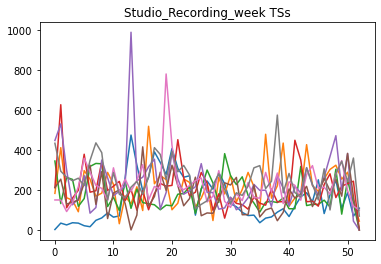

In [48]:
plt.plot(np.squeeze(tss_studio).T)
plt.title(album_type + " TSs")
plt.show()

In [49]:
tss_studio_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio)
tss_studio_scaled

array([[[-1.35604229e+00],
        [-1.07419821e+00],
        [-1.15346685e+00],
        [-1.05658295e+00],
        [-1.07419821e+00],
        [-1.18869737e+00],
        [-1.23273550e+00],
        [-9.50891419e-01],
        [-8.45199888e-01],
        [-6.25009198e-01],
        [-8.09969378e-01],
        [-7.57123612e-01],
        [ 9.33940891e-01],
        [ 2.80996557e+00],
        [ 1.48882143e+00],
        [ 3.52637468e-01],
        [ 9.51556146e-01],
        [ 2.07012485e+00],
        [ 1.60332059e+00],
        [ 1.07486293e+00],
        [ 2.21985452e+00],
        [ 1.33909176e+00],
        [ 9.51556146e-01],
        [ 1.01320954e+00],
        [-7.21893101e-01],
        [ 4.40713744e-01],
        [ 7.84211221e-01],
        [ 4.23098489e-01],
        [ 1.14532395e+00],
        [ 6.60904435e-01],
        [-2.19858327e-01],
        [-3.51972741e-01],
        [-5.98586315e-01],
        [-7.39508357e-01],
        [-7.21893101e-01],
        [-1.05658295e+00],
        [-8.54007516e-01],
 

In [50]:
tss_studio_scaled.shape

(8, 53, 1)

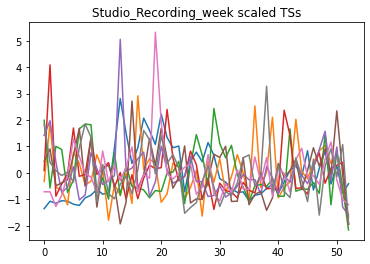

In [51]:
plt.plot(np.squeeze(tss_studio_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [52]:
df_tss_studio_scaled = pd.DataFrame(np.squeeze(tss_studio_scaled), columns = df_studio.columns, \
                                    index = df_studio.index)
df_tss_studio_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   

                          44        45        46        47        48  \
track_date_created                                                     
2009_studio         0.264561 -0.131782  0.837057 -0.651432  0.167677   
2010_studio         2.028710  0.050258 -0.229621  0.378391  0.831988   
2011_studio        -0.693567 -0.621397 -0.621397 -0.368798 -0.777767   
2012_studio        -0.594299 -0.565420 -0.806082  0.233579  0.753409   
2013_studio         0.501666 -0.089185 -0.411468  0.186098  0.877662   
2014_studio         0.502241 -0.625957  0.100111  0.949052  0.256495   
2015_studio         0.497993  0.928635 -0.152756 -0.104907 -0.439851   
2016_studio         0.566168 -0.286476 -1.087756  0.514804 -1.601396   

                          49        50        51        52        53  
track_date_created                                                    
2009_studio         0.828249 -0.422434  0.273369 -0.765931 -0.413626  
2010_studio         1.034658  0.359089  0.696874 -0.683217 -1.667617  
2011_studio         1.495618 -1.210793  0.834051 -0.561254 -2.161044  
2012_studio        -0.392143  0.156567  0.281711  0.397229 -1.951634  
2013_studio         1.575941 -0.277183  0.978376 -1.297744 -1.593170  
2014_studio         0.904371 -0.045103  2.345338 -0.078613 -1.932880  
2015_studio         0.517132  1.167881 -0.267594 -1.004472 -1.205438  
2016_studio         0.257983  0.905171 -0.142656  1.069536 -1.919854  

[8 rows x 53 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  34.16450893174389 Silhouette Score:  0.050146788528697764

k:  3 SSE:  27.135132996952212 Silhouette Score:  0.04779445027988047

k:  4 SSE:  20.754360959624485 Silhouette Score:  0.05405566134793937

k:  5 SSE:  14.178121015889635 Silhouette Score:  0.06433220329199621

k:  6 SSE:  8.705362978095444 Silhouette Score:  0.04846027966638673

k:  7 SSE:  4.199999597716849 Silhouette Score:  0.01677067139069283



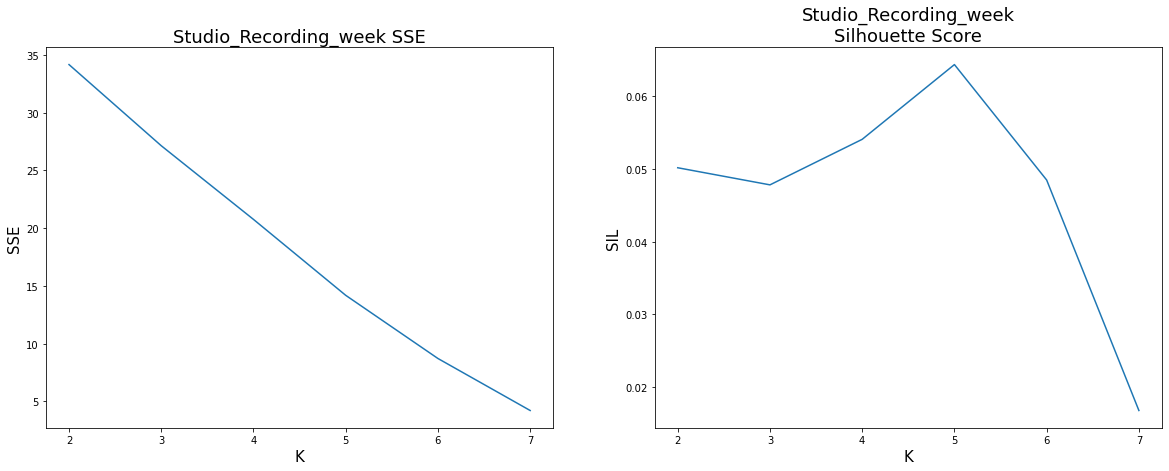

In [55]:
find_optimal_k_kmeans(7, 'euclidean', tss_studio_scaled, False, album_type)

**We can see that best k is 5**

In [56]:
cluster_centers_studio_eu, dict_label_studio_eu, labels_studio_eu = run_kmeans(5, 300, 10, 'euclidean', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (5, 53, 1)

Labels:  {0: 1, 1: 1, 2: 2, 3: 2, 4: 2}

SSE:  14.178121015889635
Silhouette Score:  0.06433220329199621


In [57]:
cluster_insight(df_tss_studio_scaled, labels_studio_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio        -0.422434  0.273369 -0.765931 -0.413626       3  
2010_studio         0.359089  0.696874 -0.683217 -1.667617       0  
2011_studio        -1.210793  0.834051 -0.561254 -2.161044       1  
2012_studio         0.156567  0.281711  0.397229 -1.951634       2  
2013_studio        -0.277183  0.978376 -1.297744 -1.593170       3  
2014_studio        -0.045103  2.345338 -0.078613 -1.932880       2  
2015_studio         1.167881 -0.267594 -1.004472 -1.205438       4  
2016_studio         0.905171 -0.142656  1.069536 -1.919854       4  

[8 rows x 54 columns]

Cluster 0
 ['2010_studio']

Cluster 1
 ['2011_studio']

Cluster 2
 ['2012_studio', '2014_studio']

Cluster 3
 ['2009_studio', '2013_studio']

Cluster 4
 ['2015_studio', '2016_studio']



**Centroids**

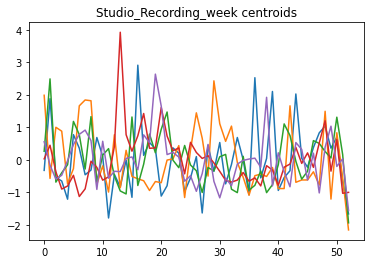

In [58]:
plot_kmeans_centroids(cluster_centers_studio_eu, album_type)

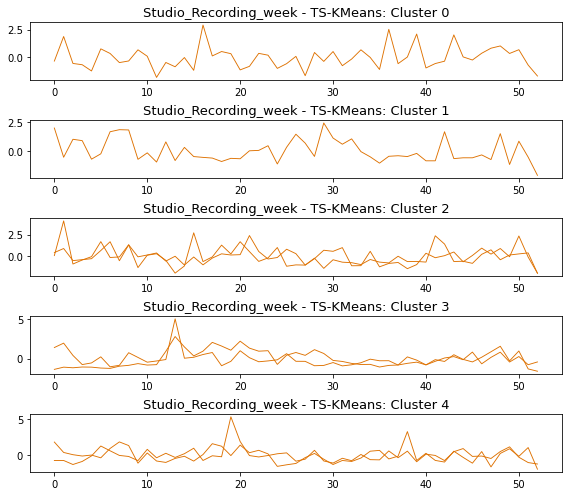

In [59]:
analyze_clusters(labels_studio_eu, tss_studio_scaled, album_type, 'TS-KMeans', False)

<h3>DTW distance</h3>

k:  2 SSE:  12.996551827970524 Silhouette Score:  0.03918638060487222

k:  3 SSE:  9.404998992964256 Silhouette Score:  0.04975222635250559

k:  4 SSE:  7.254926613874664 Silhouette Score:  0.04984360591551246

k:  5 SSE:  4.829073259671269 Silhouette Score:  0.029643948594488854

k:  6 SSE:  2.804459969844761 Silhouette Score:  0.02894189377280479

k:  7 SSE:  1.3083860544888948 Silhouette Score:  0.01466325098521879



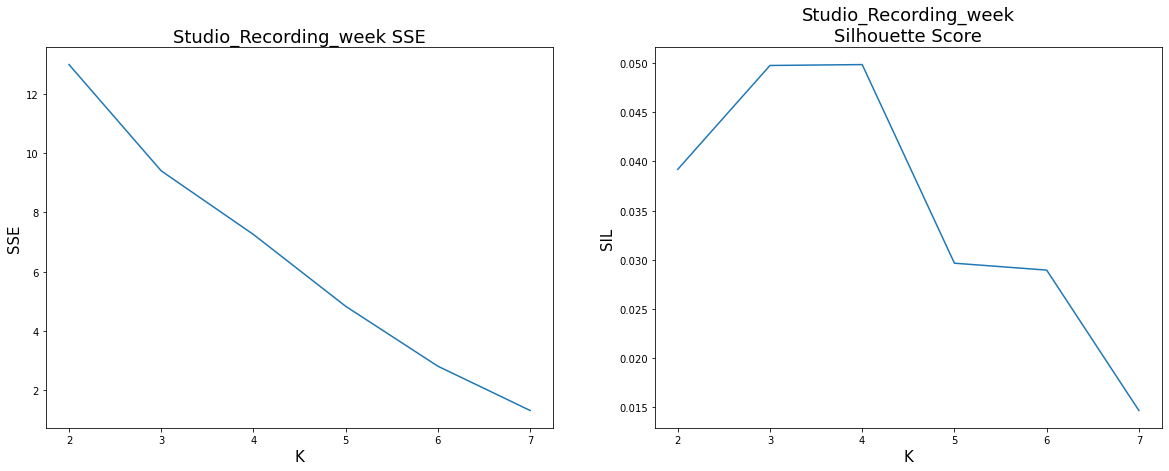

In [60]:
find_optimal_k_kmeans(7, 'dtw', tss_studio_scaled, False, album_type)

**We can see that best k is 4**

In [61]:
cluster_centers_studio_dtw, dict_label_studio_dtw, labels_studio_dtw = run_kmeans(4, 300, 10, 'dtw', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (4, 53, 1)

Labels:  {0: 2, 1: 2, 2: 3, 3: 1}

SSE:  7.153353137650939
Silhouette Score:  0.042387452150838265


In [62]:
cluster_insight(df_tss_studio_scaled, labels_studio_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio        -0.422434  0.273369 -0.765931 -0.413626       3  
2010_studio         0.359089  0.696874 -0.683217 -1.667617       2  
2011_studio        -1.210793  0.834051 -0.561254 -2.161044       0  
2012_studio         0.156567  0.281711  0.397229 -1.951634       2  
2013_studio        -0.277183  0.978376 -1.297744 -1.593170       1  
2014_studio        -0.045103  2.345338 -0.078613 -1.932880       2  
2015_studio         1.167881 -0.267594 -1.004472 -1.205438       1  
2016_studio         0.905171 -0.142656  1.069536 -1.919854       0  

[8 rows x 54 columns]

Cluster 0
 ['2011_studio', '2016_studio']

Cluster 1
 ['2013_studio', '2015_studio']

Cluster 2
 ['2010_studio', '2012_studio', '2014_studio']

Cluster 3
 ['2009_studio']



**Centroids**

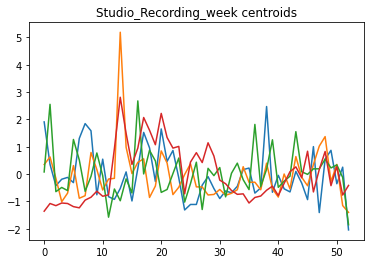

In [63]:
plot_kmeans_centroids(cluster_centers_studio_dtw, album_type)

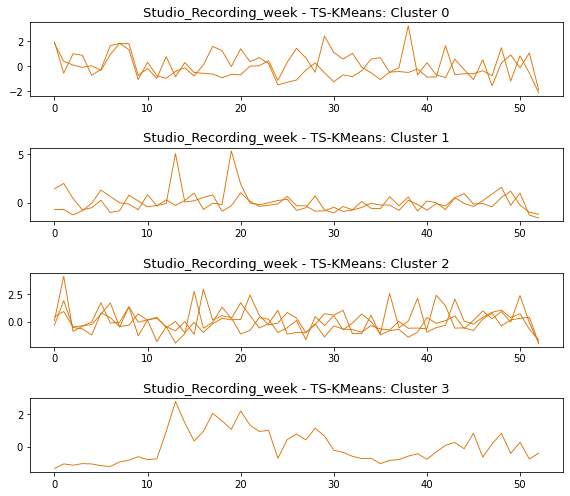

In [64]:
analyze_clusters(labels_studio_dtw, tss_studio_scaled, album_type, 'TS-KMeans', False)

<h3>KMeans sklearn</h3>

k:  2 SSE:  273.3160714539511 Silhouette Score:  0.05014678852869783
Calinski-Harabaz:  1.4350099554234828 Davies-Bouldin:  1.932429209583296

k:  3 SSE:  219.16663818244217 Silhouette Score:  0.04278273148075881
Calinski-Harabaz:  1.363323148939916 Davies-Bouldin:  1.5732429546567595

k:  4 SSE:  166.55671863256336 Silhouette Score:  0.04535710047635946
Calinski-Harabaz:  1.3779322062125137 Davies-Bouldin:  1.2159550132324117

k:  5 SSE:  113.4249681271171 Silhouette Score:  0.06433220329199622
Calinski-Harabaz:  1.4894845528631184 Davies-Bouldin:  0.9356373753580047

k:  6 SSE:  69.64290382476355 Silhouette Score:  0.048460279666386726
Calinski-Harabaz:  1.5452641983937372 Davies-Bouldin:  0.6699203580983757

k:  7 SSE:  33.59999678173479 Silhouette Score:  0.01677067139069286
Calinski-Harabaz:  1.5133167219544625 Davies-Bouldin:  0.4536403387143949



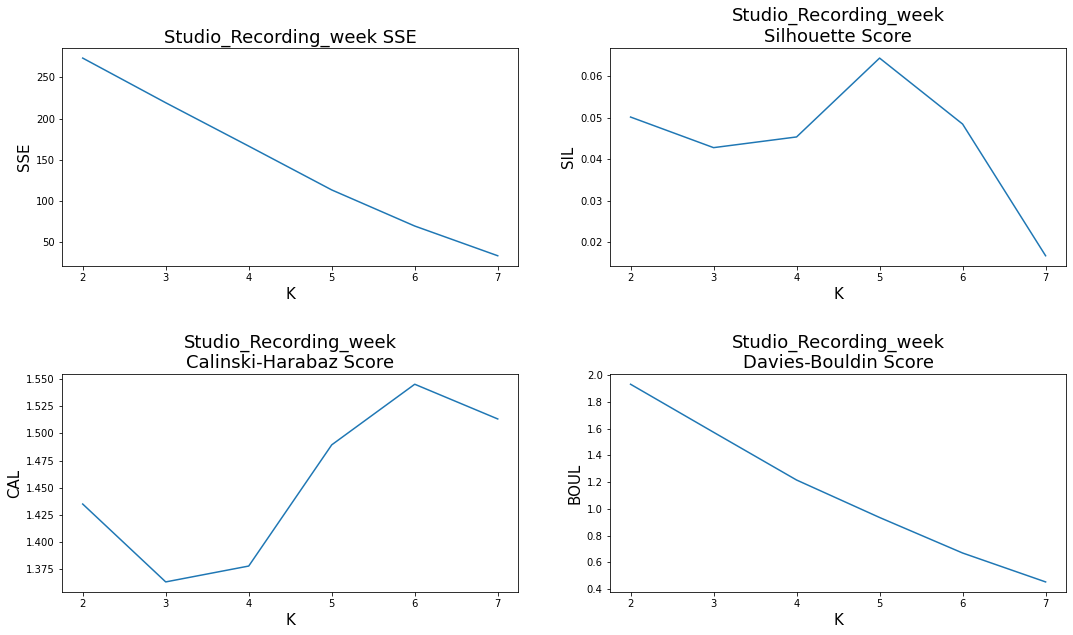

In [65]:
find_optimal_k_kmeans(7, "", df_tss_studio_scaled, True, album_type)

In [66]:
cluster_centers_studio_2, dict_label_studio_2, labels_studio_2 = run_kmeans(5, 300, 10, '', df_tss_studio_scaled,\
                                                                      True)

cluster_centers_shape (5, 53)

Labels:  {0: 1, 1: 2, 2: 2, 3: 2, 4: 1}

SSE:  113.4249681271171
Silhouette Score:  0.06433220329199622
Calinski - Harabaz Score:  1.4894845528631184
Davies - Bouldin Score:  0.9356373753580047


In [67]:
cluster_insight(df_tss_studio_scaled, labels_studio_2)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio        -0.422434  0.273369 -0.765931 -0.413626       2  
2010_studio         0.359089  0.696874 -0.683217 -1.667617       0  
2011_studio        -1.210793  0.834051 -0.561254 -2.161044       4  
2012_studio         0.156567  0.281711  0.397229 -1.951634       3  
2013_studio        -0.277183  0.978376 -1.297744 -1.593170       2  
2014_studio        -0.045103  2.345338 -0.078613 -1.932880       3  
2015_studio         1.167881 -0.267594 -1.004472 -1.205438       1  
2016_studio         0.905171 -0.142656  1.069536 -1.919854       1  

[8 rows x 54 columns]

Cluster 0
 ['2010_studio']

Cluster 1
 ['2015_studio', '2016_studio']

Cluster 2
 ['2009_studio', '2013_studio']

Cluster 3
 ['2012_studio', '2014_studio']

Cluster 4
 ['2011_studio']



<h3>DBSCAN</h3>

In [68]:
dist = pdist(df_tss_studio_scaled, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[10.21164798 10.73630314 10.59114626  8.19756022 10.36010167  8.98816327
 10.42970063 10.24502306  9.83335113  9.41899643 10.14637057  9.91762431
  9.90343099 10.3677475  10.38488707  9.29421742 11.30916466  9.74611586
  8.59467641  8.49033651  9.8800293   9.78368944 10.19170463 10.13434041
  9.76258765  9.00829964  9.45582205  9.35757066]

[[ 0.         10.21164798 10.73630314 10.59114626  8.19756022 10.36010167
   8.98816327 10.42970063]
 [10.21164798  0.         10.24502306  9.83335113  9.41899643 10.14637057
   9.91762431  9.90343099]
 [10.73630314 10.24502306  0.         10.3677475  10.38488707  9.29421742
  11.30916466  9.74611586]
 [10.59114626  9.83335113 10.3677475   0.          8.59467641  8.49033651
   9.8800293   9.78368944]
 [ 8.19756022  9.41899643 10.38488707  8.59467641  0.         10.19170463
  10.13434041  9.76258765]
 [10.36010167 10.14637057  9.29421742  8.49033651 10.19170463  0.
   9.00829964  9.45582205]
 [ 8.98816327  9.91762431 11.30916466  9.8800293  10.134340

In [100]:
k = 2
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

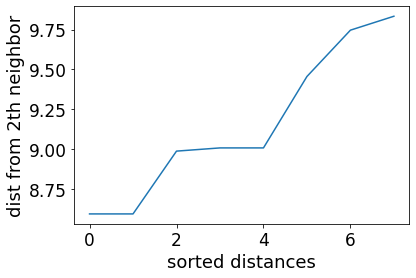

In [101]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(labelsize=17)
plt.show()

In [102]:
eps_to_test = np.arange(9.0, 9.25, 0.01)
min_samples_to_test = [2, 3, 4, 5]

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [9.   9.01 9.02 9.03 9.04 9.05 9.06 9.07 9.08 9.09 9.1  9.11 9.12 9.13
 9.14 9.15 9.16 9.17 9.18 9.19 9.2  9.21 9.22 9.23 9.24]
min_samples: [2, 3, 4, 5]


In [103]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

In [104]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_tss_studio_scaled, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 9.0 and min_samples =   2 | 9.824    1
  2 | Tested with eps = 9.0 and min_samples =   3 | 9.824    1
  3 | Tested with eps = 9.0 and min_samples =   4 | 9.545    0
  4 | Tested with eps = 9.0 and min_samples =   5 | 9.545    0
  5 | Tested with eps = 9.01 and min_samples =   2 | 9.824    1
  6 | Tested with eps = 9.01 and min_samples =   3 | 9.824    1
  7 | Tested with eps = 9.01 and min_samples =   4 | 9.545    0
  8 | Tested with eps = 9.01 and min_samples =   5 | 9.545    0
  9 | Tested with eps = 9.02 and min_samples =   2 | 9.824    1
 10 | Tested with eps = 9.02 and min_samples =   3 | 9.824    1
 11 | Tested with eps = 9.02 and min_samples =   4 | 9.545    0
 12 | Tested with eps = 9.02 and min_samples =   5 | 9.545    0
 13 | Tested with eps = 9.03 and min_samples =   2 | 9.824    1
 14 | Tested with eps = 9.03 and min_sam

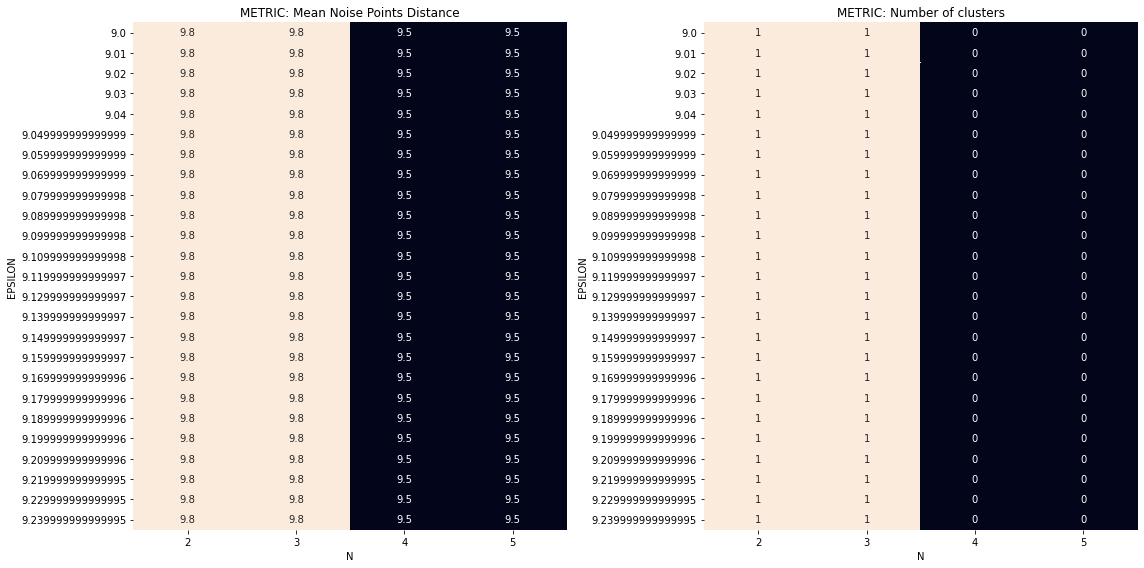

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [106]:
best_dbscan_model = DBSCAN(eps = 9.4, min_samples = 2)

# Fitting
best_dbscan_model.fit(df_tss_studio_scaled)

# Extracting labels
#df_tss_studio_scaled["LABEL"] = best_dbscan_model.labels_

DBSCAN(eps=9.4, min_samples=2)

In [107]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([-1,  0]), array([1, 7]))

In [108]:
cluster_insight(df_tss_studio_scaled, best_dbscan_model.labels_)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio        -0.422434  0.273369 -0.765931 -0.413626       0  
2010_studio         0.359089  0.696874 -0.683217 -1.667617      -1  
2011_studio        -1.210793  0.834051 -0.561254 -2.161044       0  
2012_studio         0.156567  0.281711  0.397229 -1.951634       0  
2013_studio        -0.277183  0.978376 -1.297744 -1.593170       0  
2014_studio        -0.045103  2.345338 -0.078613 -1.932880       0  
2015_studio         1.167881 -0.267594 -1.004472 -1.205438       0  
2016_studio         0.905171 -0.142656  1.069536 -1.919854       0  

[8 rows x 54 columns]

Cluster -1
 ['2010_studio']

Cluster 0
 ['2009_studio', '2011_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2016_studio']



<h3>Hierarchical Clustering</h3>

**Single**

In [109]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', \
                                       linkage='single').fit(df_tss_studio_scaled.values)

In [110]:
model_single.n_clusters_

8

In [111]:
hist, bins = np.histogram(model_single.labels_, bins=range(0, len(set(model_single.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 7, 1: 1}

Silhouette Score 0.016340030417143433
Separation Score 0.840861401687085
Variance Ratio Criterion Score 1.0578888339259747

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 6, 1: 1, 2: 1}

Silhouette Score -0.007841147366049461
Separation Score 0.8408252194148688
Variance Ratio Criterion Score 1.0189973695391494

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 5, 1: 1, 2: 1, 3: 1}

Silhouette Score 0.010405544229311198
Separation Score 0.7542254731012505
Variance Ratio Criterion Score 1.1788314370838235

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 4, 1: 1, 2: 1, 3: 1, 4: 1}

Silhouette Score -0.005284852348436453
Separation Score 0.7319635208234985
Variance Ratio Criterion Score 1.1437531405132821

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.048460

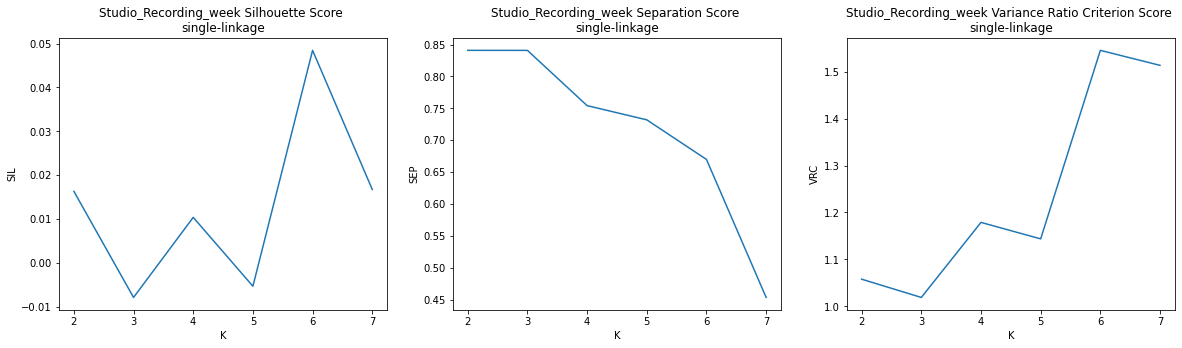

In [112]:
interpret_dendrogram(7, 'single', df_tss_studio_scaled.values)

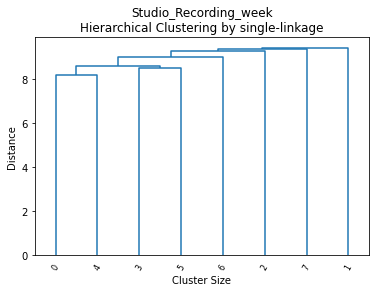

In [116]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='lastp', 
                p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

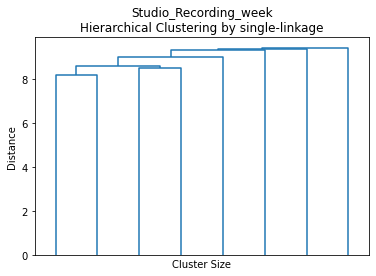

In [118]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='level', 
                p=30, no_labels=True, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Complete**

In [119]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='complete').fit(df_tss_studio_scaled.values)

In [120]:
model_complete.n_clusters_

8

In [121]:
hist, bins = np.histogram(model_complete.labels_, bins=range(0, len(set(model_complete.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 7, 1: 1}

Silhouette Score 0.052176130931292385
Separation Score 0.7771451411126128
Variance Ratio Criterion Score 1.2403659468766606

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 5, 1: 1, 2: 2}

Silhouette Score 0.04382608265541315
Separation Score 1.2643639203157548
Variance Ratio Criterion Score 1.3924671957568353

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 4, 1: 1, 2: 2, 3: 1}

Silhouette Score 0.051201270193546713
Separation Score 1.0484269520148124
Variance Ratio Criterion Score 1.4120497082046948

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.06433220329199622
Separation Score 0.9356373753580047
Variance Ratio Criterion Score 1.4894845528631184

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.048460279

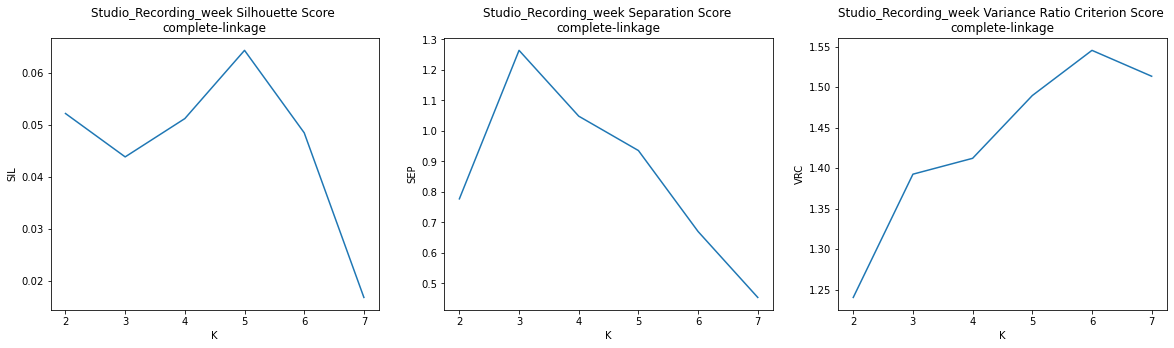

In [122]:
interpret_dendrogram(7, 'complete', df_tss_studio_scaled.values)

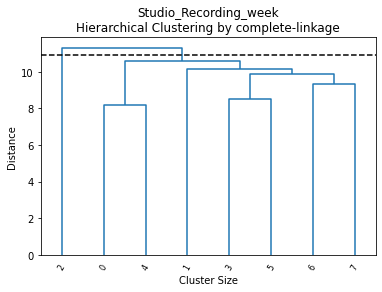

In [127]:
cut_distance = 10.9
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

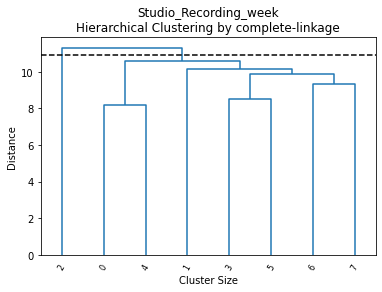

In [129]:
cut_distance = 10.9
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Average**

In [130]:
model_average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                            linkage='average').fit(df_tss_studio_scaled.values)

In [131]:
model_average.n_clusters_

8

In [132]:
hist, bins = np.histogram(model_average.labels_, bins=range(0, len(set(model_average.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 7, 1: 1}

Silhouette Score 0.052176130931292385
Separation Score 0.7771451411126128
Variance Ratio Criterion Score 1.2403659468766606

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 1, 2: 4}

Silhouette Score 0.037885528273933614
Separation Score 1.4423731621719638
Variance Ratio Criterion Score 1.3908044950277747

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 4, 1: 1, 2: 2, 3: 1}

Silhouette Score 0.051201270193546713
Separation Score 1.0484269520148124
Variance Ratio Criterion Score 1.4120497082046948

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.06433220329199622
Separation Score 0.9356373753580047
Variance Ratio Criterion Score 1.4894845528631184

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.04846027

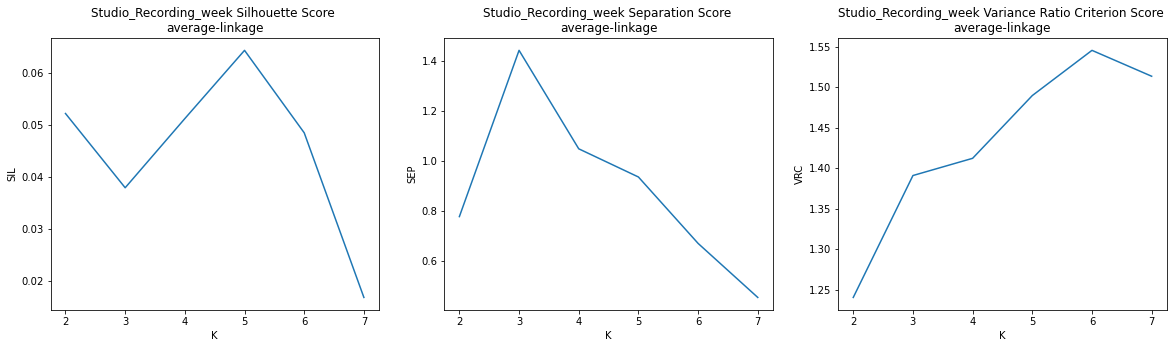

In [133]:
interpret_dendrogram(7, 'average', df_tss_studio_scaled.values)

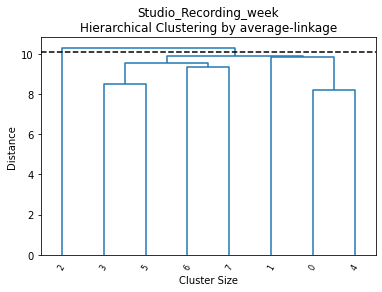

In [138]:
cut_distance = 10.1
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

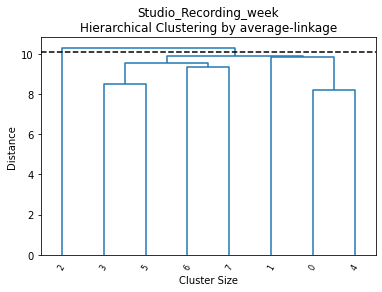

In [139]:
cut_distance = 10.1
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Ward**

In [140]:
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                        linkage='ward').fit(df_tss_studio_scaled.values)

In [141]:
model_ward.n_clusters_

8

In [142]:
hist, bins = np.histogram(model_ward.labels_, bins=range(0, len(set(model_ward.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 6, 1: 2}

Silhouette Score 0.058986741678521845
Separation Score 1.5838044730579828
Variance Ratio Criterion Score 1.4212116201519134

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 2, 2: 3}

Silhouette Score 0.056884848458032405
Separation Score 1.6595749378647755
Variance Ratio Criterion Score 1.4033366490987143

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 3, 1: 2, 2: 2, 3: 1}

Silhouette Score 0.058489594099989925
Separation Score 1.248664072318554
Variance Ratio Criterion Score 1.4150048012566756

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.06433220329199622
Separation Score 0.9356373753580047
Variance Ratio Criterion Score 1.4894845528631184

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.048460279

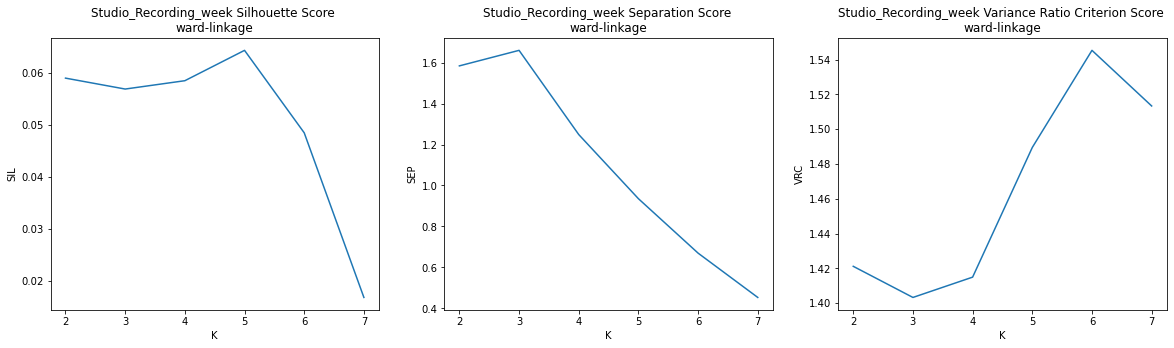

In [143]:
interpret_dendrogram(7, 'ward', df_tss_studio_scaled.values)

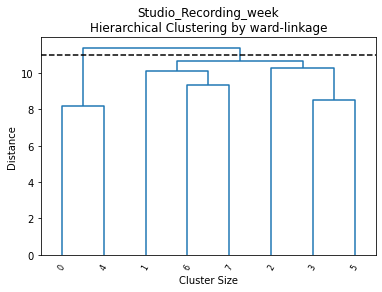

In [148]:
cut_distance = 11
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

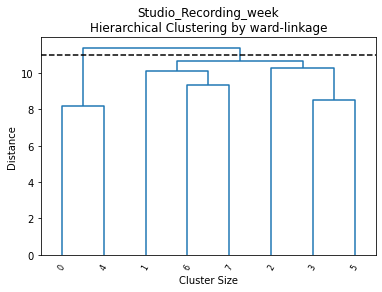

In [149]:
cut_distance = 11
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [150]:
F = [list(calculate_features(x).values())for x in tss_studio_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  19.398568812525948 Silhouette Score:  0.7881798897716084
Calinski-Harabaz:  53.53911639810288 Davies-Bouldin:  0.23133907828106143

k:  3 SSE:  4.745568280754963 Silhouette Score:  0.6702540971581339
Calinski-Harabaz:  98.90809085407088 Davies-Bouldin:  0.1725115491772996

k:  4 SSE:  1.3396688674502437 Silhouette Score:  0.5131284343834117
Calinski-Harabaz:  190.25192819373868 Davies-Bouldin:  0.08224328328525907

k:  5 SSE:  0.1648092217103436 Silhouette Score:  0.43756607572327544
Calinski-Harabaz:  875.2428862745058 Davies-Bouldin:  0.14025179328634096

k:  6 SSE:  0.04625167357596583 Silhouette Score:  0.3060303470158455
Calinski-Harabaz:  1664.3666375266184 Davies-Bouldin:  0.13981624921212218

k:  7 SSE:  0.014741684043676912 Silhouette Score:  0.19908721099244853
Calinski-Harabaz:  2176.1519409097496 Davies-Bouldin:  0.05753994371342336



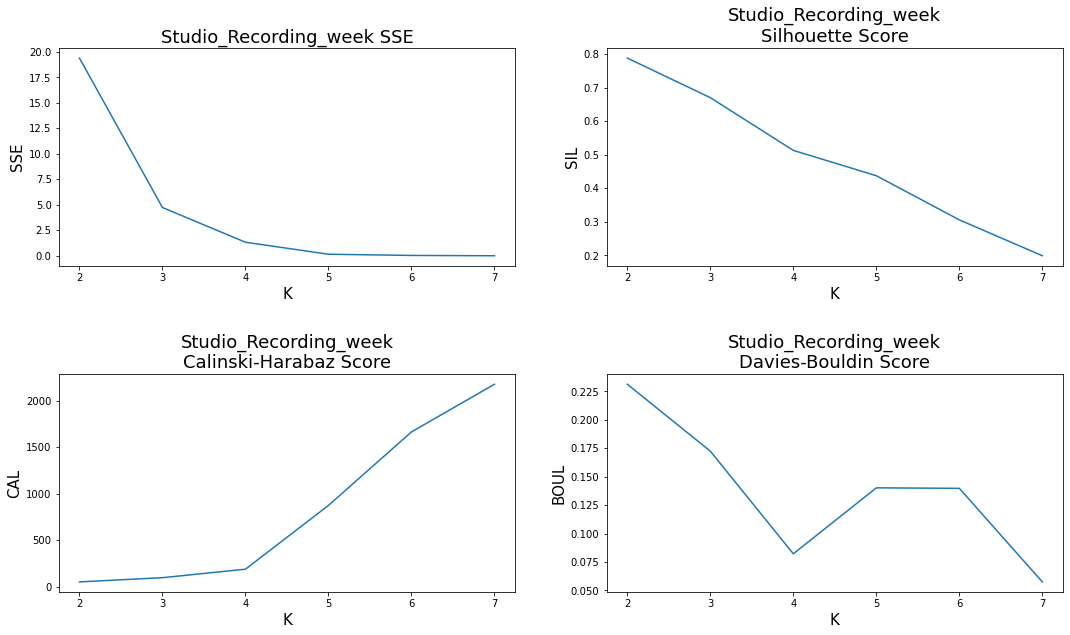

In [151]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [152]:
cluster_centers_studio_fb, dict_label_studio_fb, labels_studio_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 5, 1: 2, 2: 1}

SSE:  4.745568280754963
Silhouette Score:  0.6702540971581339
Calinski - Harabaz Score:  98.90809085407088
Davies - Bouldin Score:  0.1725115491772996


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

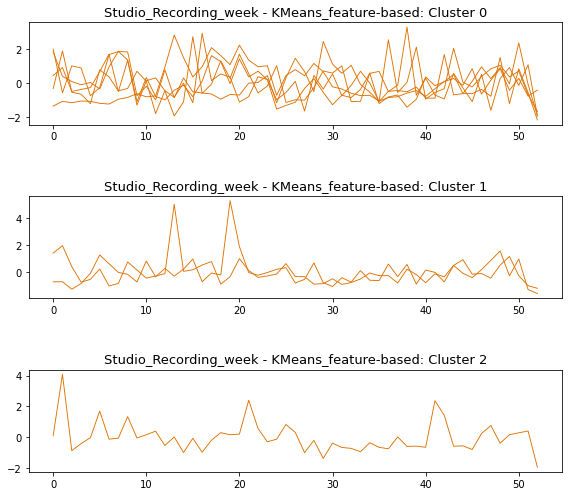

In [153]:
analyze_clusters(labels_studio_fb, tss_studio_scaled, album_type, 'KMeans_feature-based', False)

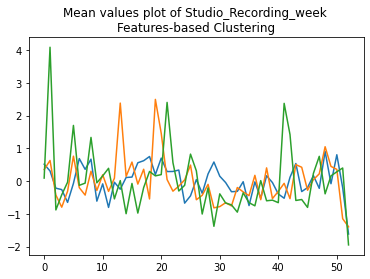

In [154]:
plot_mean_values(labels_studio_fb, tss_studio_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [155]:
M = pairwise_distances(tss_studio_scaled.reshape(tss_studio_scaled.shape[0], tss_studio_scaled.shape[1]), \
                       metric=cdm_dist)

In [156]:
print(tss_studio_scaled.shape, M.shape)

(8, 53, 1) (8, 8)


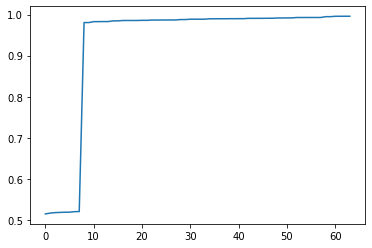

In [157]:
plt.plot(sorted(M.ravel()))
plt.show()

In [158]:
dbscan_compression_studio = DBSCAN(eps=0.98, min_samples=5, metric='precomputed')
dbscan_compression_studio.fit(M)

DBSCAN(eps=0.98, metric='precomputed')

In [159]:
dbscan_compression_studio.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [160]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_scaled)

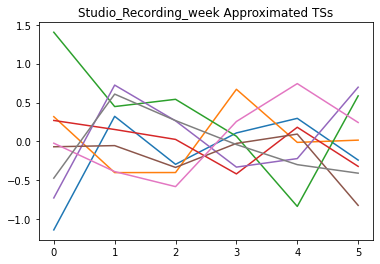

In [161]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " Approximated TSs")
plt.show()

k:  2 SSE:  0.6511455315979839 Silhouette Score:  0.33554081104110106

k:  3 SSE:  0.4162684080097373 Silhouette Score:  0.1996103843567834

k:  4 SSE:  0.22037855702949272 Silhouette Score:  0.21103535943975604

k:  5 SSE:  0.14057699951996633 Silhouette Score:  0.16831503949313953

k:  6 SSE:  0.07395575459546481 Silhouette Score:  0.1187649865269674

k:  7 SSE:  0.01638163948467941 Silhouette Score:  0.11107406646902229



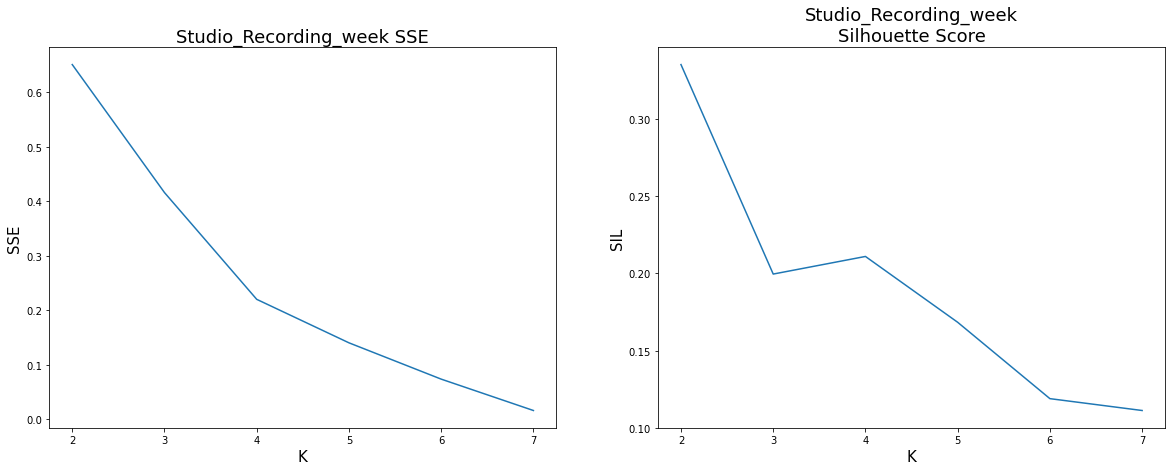

In [162]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [163]:
cluster_centers_studio_paa, dict_label_studio_paa, labels_studio_paa = run_kmeans(4, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (4, 6, 1)

Labels:  {0: 4, 1: 1, 2: 2, 3: 1}

SSE:  0.22037855702949272
Silhouette Score:  0.21103535943975604


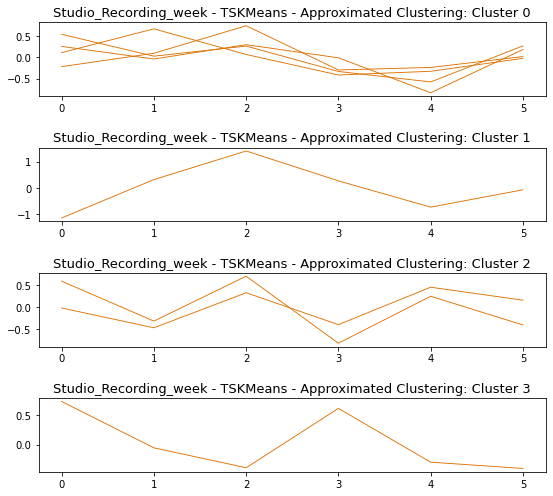

In [164]:
analyze_clusters(labels_studio_paa, X_paa, album_type, 'TSKMeans - Approximated Clustering', False)

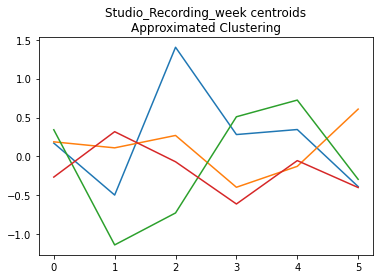

In [165]:
plot_centroids_approximated(cluster_centers_studio_paa, X_paa, album_type)

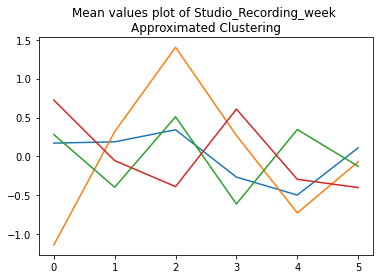

In [166]:
plot_mean_values_approximated(labels_studio_paa, X_paa, album_type)

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Live_Recording</h1>

In [167]:
album_type = "Live_Recording_week"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [168]:
df_live

1   2   3   4   5   6    7    8   9  10  ...  44  45  \
track_date_created                                             ...           
2009_live           128  12  22  98  15  13   19  100  73  64  ...  37  24   
2010_live            23  48  35  54  54  39   26   29  11  12  ...  30   8   
2011_live             2  29  21  20   6   1   71   14  22   4  ...  62  36   
2012_live             8   6  14   2  72  17  106   20   6   0  ...   0   3   
2013_live            17   6   1  17   0   2   26   46  18   0  ...   8  25   
2014_live            21  14  17   5  55  17   36   43  11   0  ...   0  10   
2015_live             0  19  14  11  18  10   12   18  25  12  ...   0   7   
2016_live            23  21   6   9  23  30    7    7  51   1  ...  36   7   

                    46  47  48  49  50   51  52  53  
track_date_created                                   
2009_live           23  47   9  34  20  114  22   9  
2010_live           28   2  13  16  29    2   1   2  
2011_live           48  18  29  23  96   32   5   0  
2012_live            8   7  22  21  21   25   0   0  
2013_live           13   1   1  28  23   37   0   0  
2014_live            0   0   1  10   5    4   0   0  
2015_live           15   5   0   5   8   52   0  28  
2016_live           30   0   3  20  10   49   2   0  

[8 rows x 53 columns]

In [169]:
df_live.shape

(8, 53)

In [170]:
tss_live = to_time_series_dataset(df_live.values)
tss_live

array([[[128.],
        [ 12.],
        [ 22.],
        [ 98.],
        [ 15.],
        [ 13.],
        [ 19.],
        [100.],
        [ 73.],
        [ 64.],
        [ 74.],
        [ 75.],
        [113.],
        [123.],
        [ 66.],
        [ 43.],
        [105.],
        [ 51.],
        [ 66.],
        [ 47.],
        [  5.],
        [ 66.],
        [101.],
        [ 21.],
        [ 63.],
        [ 38.],
        [ 32.],
        [116.],
        [ 28.],
        [ 21.],
        [ 48.],
        [ 43.],
        [ 35.],
        [ 13.],
        [ 29.],
        [ 71.],
        [ 25.],
        [ 19.],
        [ 23.],
        [ 17.],
        [ 28.],
        [ 38.],
        [ 57.],
        [ 37.],
        [ 24.],
        [ 23.],
        [ 47.],
        [  9.],
        [ 34.],
        [ 20.],
        [114.],
        [ 22.],
        [  9.]],

       [[ 23.],
        [ 48.],
        [ 35.],
        [ 54.],
        [ 54.],
        [ 39.],
        [ 26.],
        [ 29.],
        [ 11.],
      

In [171]:
tss_live.shape

(8, 53, 1)

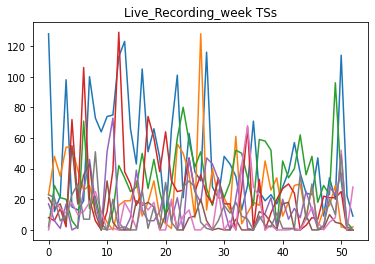

In [172]:
plt.plot(np.squeeze(tss_live).T)
plt.title(album_type + " TSs")
plt.show()

In [173]:
tss_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_live)
tss_live_scaled

array([[[ 2.33568099e+00],
        [-1.08249723e+00],
        [-7.87826698e-01],
        [ 1.45166938e+00],
        [-9.94096073e-01],
        [-1.05303018e+00],
        [-8.76227859e-01],
        [ 1.51060348e+00],
        [ 7.14993037e-01],
        [ 4.49789554e-01],
        [ 7.44460091e-01],
        [ 7.73927144e-01],
        [ 1.89367518e+00],
        [ 2.18834572e+00],
        [ 5.08723662e-01],
        [-1.69018572e-01],
        [ 1.65793875e+00],
        [ 6.67178573e-02],
        [ 5.08723662e-01],
        [-5.11503572e-02],
        [-1.28876661e+00],
        [ 5.08723662e-01],
        [ 1.54007054e+00],
        [-8.17293751e-01],
        [ 4.20322501e-01],
        [-3.16353840e-01],
        [-4.93156162e-01],
        [ 1.98207634e+00],
        [-6.11024376e-01],
        [-8.17293751e-01],
        [-2.16833036e-02],
        [-1.69018572e-01],
        [-4.04755001e-01],
        [-1.05303018e+00],
        [-5.81557322e-01],
        [ 6.56058930e-01],
        [-6.99425537e-01],
 

In [174]:
tss_live_scaled.shape

(8, 53, 1)

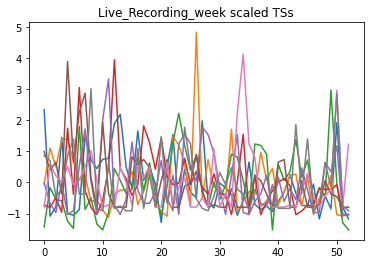

In [175]:
plt.plot(np.squeeze(tss_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [176]:
df_tss_live_scaled = pd.DataFrame(np.squeeze(tss_live_scaled), columns = df_live.columns, \
                                    index = df_live.index)
df_tss_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          44        45        46        47        48  \
track_date_created                                                     
2009_live          -0.345821 -0.728893 -0.758360 -0.051150 -1.170898   
2010_live           0.268637 -0.754994  0.175580 -1.034166 -0.522350   
2011_live           1.378457  0.160820  0.722806 -0.682159 -0.167005   
2012_live          -1.033832 -0.918154 -0.725356 -0.763915 -0.185522   
2013_live          -0.549540  0.465082 -0.251122 -0.967325 -0.967325   
2014_live          -0.795701  0.056262 -0.795701 -0.795701 -0.710504   
2015_live          -0.791993 -0.286262  0.291715 -0.430757 -0.791993   
2016_live           1.859167 -0.371543  1.397641 -0.909991 -0.679227   

                          49        50        51        52        53  
track_date_created                                                    
2009_live          -0.434222 -0.846761  1.923142 -0.787827 -1.170898  
2010_live          -0.382764  0.222109 -1.034166 -1.080695 -1.034166  
2011_live          -0.447998  2.970751 -0.026509 -1.290978 -1.525139  
2012_live          -0.224082 -0.224082 -0.069844 -1.033832 -1.033832  
2013_live           0.644133  0.345715  1.181285 -1.027009 -1.027009  
2014_live           0.056262 -0.369719 -0.454916 -0.795701 -0.795701  
2015_live          -0.430757 -0.214015  2.964861 -0.791993  1.230929  
2016_live           0.628430 -0.140780  2.859141 -0.756148 -0.909991  

[8 rows x 53 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  36.213029173323484 Silhouette Score:  0.03755331710170827

k:  3 SSE:  27.99383025592541 Silhouette Score:  0.06110328054442346

k:  4 SSE:  20.021953130238977 Silhouette Score:  0.09692535455749948

k:  5 SSE:  14.790912354621238 Silhouette Score:  0.06999200876942496

k:  6 SSE:  9.588680384301462 Silhouette Score:  0.04674122147375998

k:  7 SSE:  4.754237583251367 Silhouette Score:  0.013090639398713797



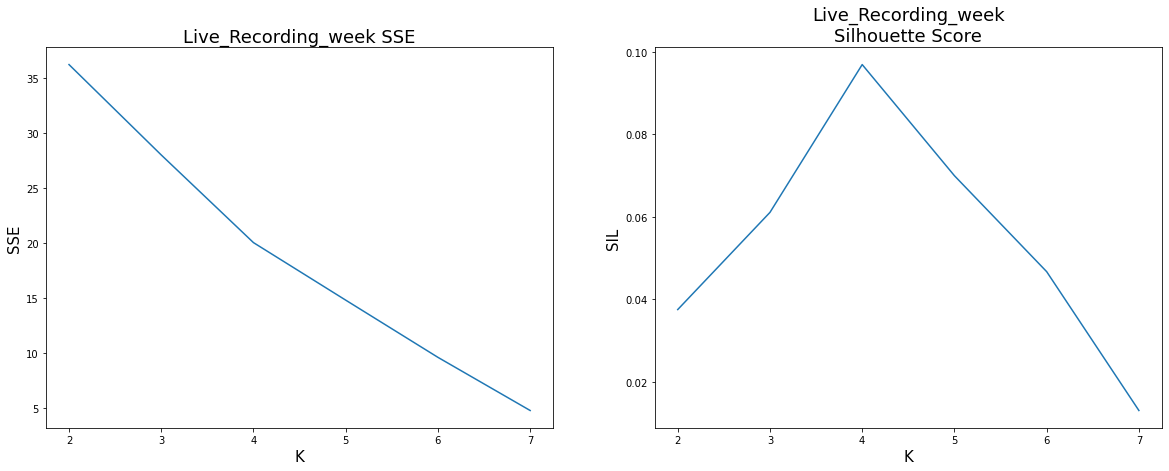

In [177]:
find_optimal_k_kmeans(7, 'euclidean', tss_live_scaled, False, album_type)

**We can see that best k is 4**

In [178]:
cluster_centers_live_eu, dict_label_live_eu, labels_live_eu = run_kmeans(4, 300, 10, 'euclidean', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (4, 53, 1)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  20.021953130238977
Silhouette Score:  0.09692535455749948


In [179]:
cluster_insight(df_tss_live_scaled, labels_live_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live          -0.846761  1.923142 -0.787827 -1.170898       0  
2010_live           0.222109 -1.034166 -1.080695 -1.034166       3  
2011_live           2.970751 -0.026509 -1.290978 -1.525139       3  
2012_live          -0.224082 -0.069844 -1.033832 -1.033832       1  
2013_live           0.345715  1.181285 -1.027009 -1.027009       0  
2014_live          -0.369719 -0.454916 -0.795701 -0.795701       1  
2015_live          -0.214015  2.964861 -0.791993  1.230929       2  
2016_live          -0.140780  2.859141 -0.756148 -0.909991       2  

[8 rows x 54 columns]

Cluster 0
 ['2009_live', '2013_live']

Cluster 1
 ['2012_live', '2014_live']

Cluster 2
 ['2015_live', '2016_live']

Cluster 3
 ['2010_live', '2011_live']



**Centroids**

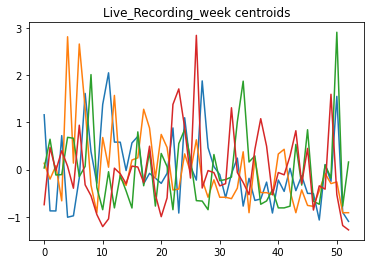

In [180]:
plot_kmeans_centroids(cluster_centers_live_eu, album_type)

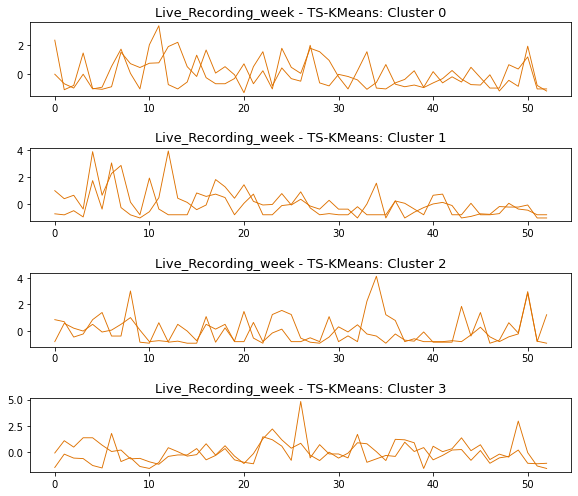

In [181]:
analyze_clusters(labels_live_eu, tss_live_scaled, album_type, 'TS-KMeans', False)

<h3>DTW distance</h3>

k:  2 SSE:  12.336008114550108 Silhouette Score:  0.024286713976991767

k:  3 SSE:  9.768278272439668 Silhouette Score:  0.029775557367613503

k:  4 SSE:  6.635198829115102 Silhouette Score:  0.0684192359883947

k:  5 SSE:  4.305368975628035 Silhouette Score:  0.06502041922162749

k:  6 SSE:  2.942664523023141 Silhouette Score:  0.04840780165844273

k:  7 SSE:  1.1594314975407978 Silhouette Score:  0.028094686710614936



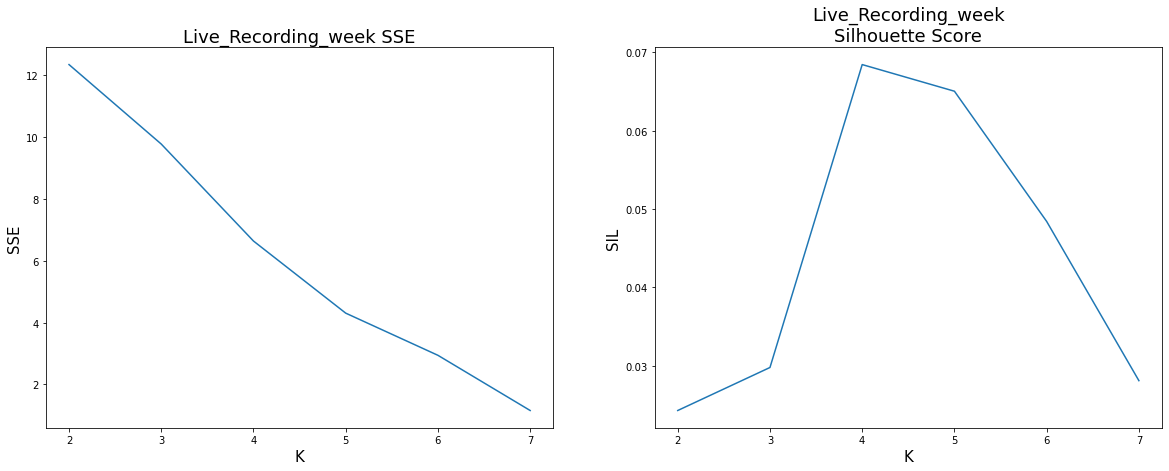

In [182]:
find_optimal_k_kmeans(7, 'dtw', tss_live_scaled, False, album_type)

**We can see that best k is 4**

In [183]:
cluster_centers_live_dtw, dict_label_live_dtw, labels_live_dtw = run_kmeans(4, 300, 10, 'dtw', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (4, 53, 1)

Labels:  {0: 2, 1: 3, 2: 2, 3: 1}

SSE:  6.691601823656827
Silhouette Score:  0.0684192359883947


In [184]:
cluster_insight(df_tss_live_scaled, labels_live_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live          -0.846761  1.923142 -0.787827 -1.170898       0  
2010_live           0.222109 -1.034166 -1.080695 -1.034166       2  
2011_live           2.970751 -0.026509 -1.290978 -1.525139       1  
2012_live          -0.224082 -0.069844 -1.033832 -1.033832       2  
2013_live           0.345715  1.181285 -1.027009 -1.027009       1  
2014_live          -0.369719 -0.454916 -0.795701 -0.795701       0  
2015_live          -0.214015  2.964861 -0.791993  1.230929       3  
2016_live          -0.140780  2.859141 -0.756148 -0.909991       1  

[8 rows x 54 columns]

Cluster 0
 ['2009_live', '2014_live']

Cluster 1
 ['2011_live', '2013_live', '2016_live']

Cluster 2
 ['2010_live', '2012_live']

Cluster 3
 ['2015_live']



**Centroids**

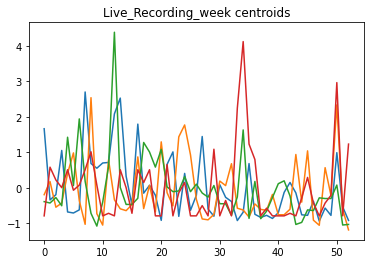

In [185]:
plot_kmeans_centroids(cluster_centers_live_dtw, album_type)

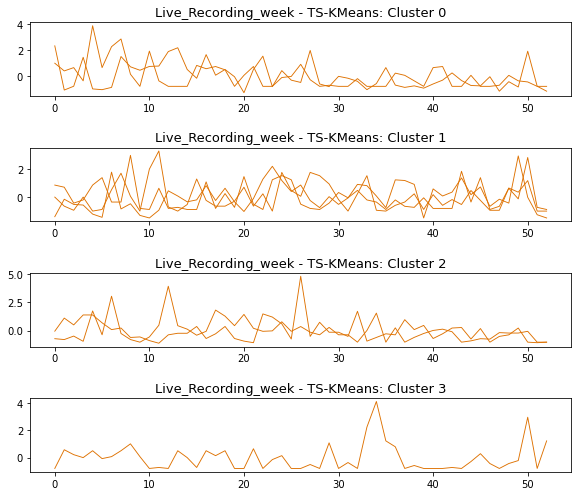

In [186]:
analyze_clusters(labels_live_dtw, tss_live_scaled, album_type, 'TS-KMeans', False)

<h3>KMeans sklearn</h3>

k:  2 SSE:  287.42336727117225 Silhouette Score:  0.04509147737487547
Calinski-Harabaz:  1.3775867182710557 Davies-Bouldin:  1.9861496086846075

k:  3 SSE:  223.79894330630304 Silhouette Score:  0.05892732755083759
Calinski-Harabaz:  1.4479089012764905 Davies-Bouldin:  1.6396975857798524

k:  4 SSE:  160.17562504191181 Silhouette Score:  0.09692535455749957
Calinski-Harabaz:  1.6085636089146151 Davies-Bouldin:  1.1583356148402015

k:  5 SSE:  118.32729883696993 Silhouette Score:  0.06999200876942507
Calinski-Harabaz:  1.490069322276736 Davies-Bouldin:  0.8940299400804206

k:  6 SSE:  76.7094430744117 Silhouette Score:  0.04674122147376007
Calinski-Harabaz:  1.4428768192581547 Davies-Bouldin:  0.7000440394642578

k:  7 SSE:  38.03390066601094 Silhouette Score:  0.013090639398713775
Calinski-Harabaz:  1.38201810297938 Davies-Bouldin:  0.46947774572588447



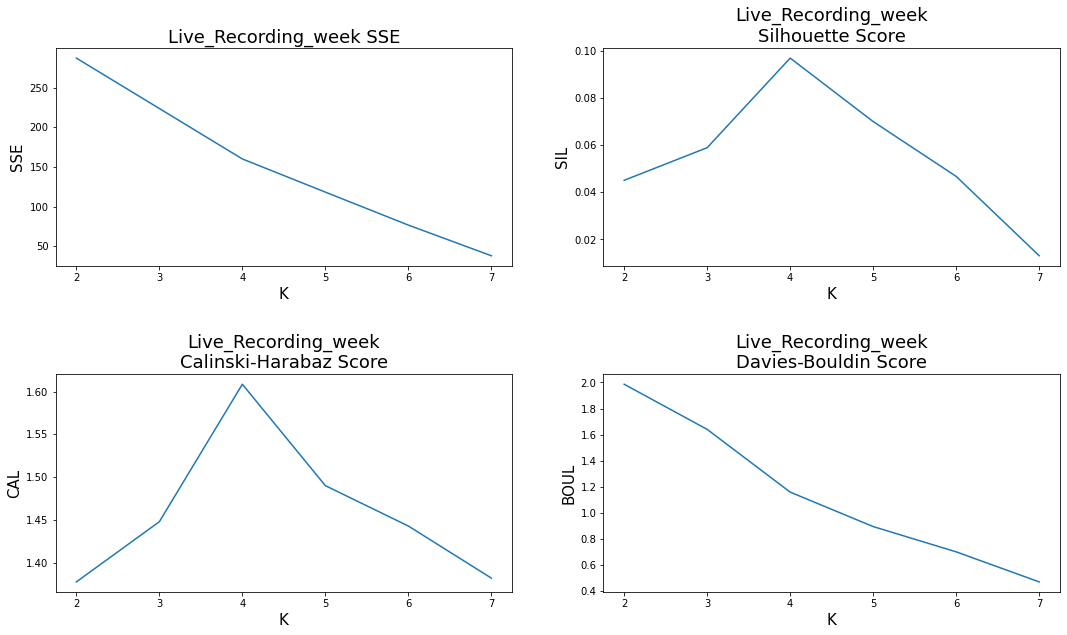

In [187]:
find_optimal_k_kmeans(7, "", df_tss_live_scaled, True, album_type)

In [188]:
cluster_centers_live_2, dict_label_live_2, labels_live_2 = run_kmeans(4, 300, 10, '', df_tss_live_scaled,\
                                                                      True)

cluster_centers_shape (4, 53)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  160.17562504191181
Silhouette Score:  0.09692535455749957
Calinski - Harabaz Score:  1.6085636089146154
Davies - Bouldin Score:  1.1583356148402018


In [189]:
cluster_insight(df_tss_live_scaled, labels_live_2)

1         2         3         4         5  \
track_date_created                                                     
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live          -0.846761  1.923142 -0.787827 -1.170898       2  
2010_live           0.222109 -1.034166 -1.080695 -1.034166       3  
2011_live           2.970751 -0.026509 -1.290978 -1.525139       3  
2012_live          -0.224082 -0.069844 -1.033832 -1.033832       1  
2013_live           0.345715  1.181285 -1.027009 -1.027009       2  
2014_live          -0.369719 -0.454916 -0.795701 -0.795701       1  
2015_live          -0.214015  2.964861 -0.791993  1.230929       0  
2016_live          -0.140780  2.859141 -0.756148 -0.909991       0  

[8 rows x 54 columns]

Cluster 0
 ['2015_live', '2016_live']

Cluster 1
 ['2012_live', '2014_live']

Cluster 2
 ['2009_live', '2013_live']

Cluster 3
 ['2010_live', '2011_live']



<h3>DBSCAN</h3>

In [190]:
dist = pdist(df_tss_live_scaled, 'euclidean') #pair wise distance
#print (dist)
dist = squareform(dist) #distance matrix given the vector dist
#print()
#print(dist)

In [193]:
k = 2
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

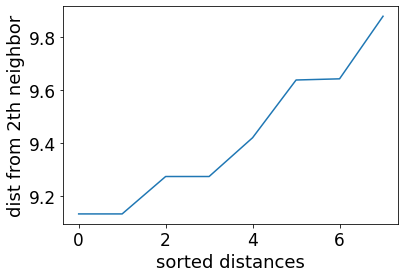

In [194]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(labelsize=17)
plt.show()

In [195]:
eps_to_test = np.arange(9.3, 9.4, 0.01)
min_samples_to_test = [2, 3, 4, 5]

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [9.3  9.31 9.32 9.33 9.34 9.35 9.36 9.37 9.38 9.39]
min_samples: [2, 3, 4, 5]


In [196]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

In [197]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_tss_live_scaled, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 9.3 and min_samples =   2 |  None    3
  2 | Tested with eps = 9.3 and min_samples =   3 | 9.809    1
  3 | Tested with eps = 9.3 and min_samples =   4 | 9.725    0
  4 | Tested with eps = 9.3 and min_samples =   5 | 9.725    0
  5 | Tested with eps = 9.31 and min_samples =   2 |  None    3
  6 | Tested with eps = 9.31 and min_samples =   3 | 9.809    1
  7 | Tested with eps = 9.31 and min_samples =   4 | 9.725    0
  8 | Tested with eps = 9.31 and min_samples =   5 | 9.725    0
  9 | Tested with eps = 9.32 and min_samples =   2 |  None    3
 10 | Tested with eps = 9.32 and min_samples =   3 | 9.809    1
 11 | Tested with eps = 9.32 and min_samples =   4 | 9.725    0
 12 | Tested with eps = 9.32 and min_samples =   5 | 9.725    0
 13 | Tested with eps = 9.33 and min_samples =   2 |  None    3
 14 | Tested with eps = 9.33 and min_sam

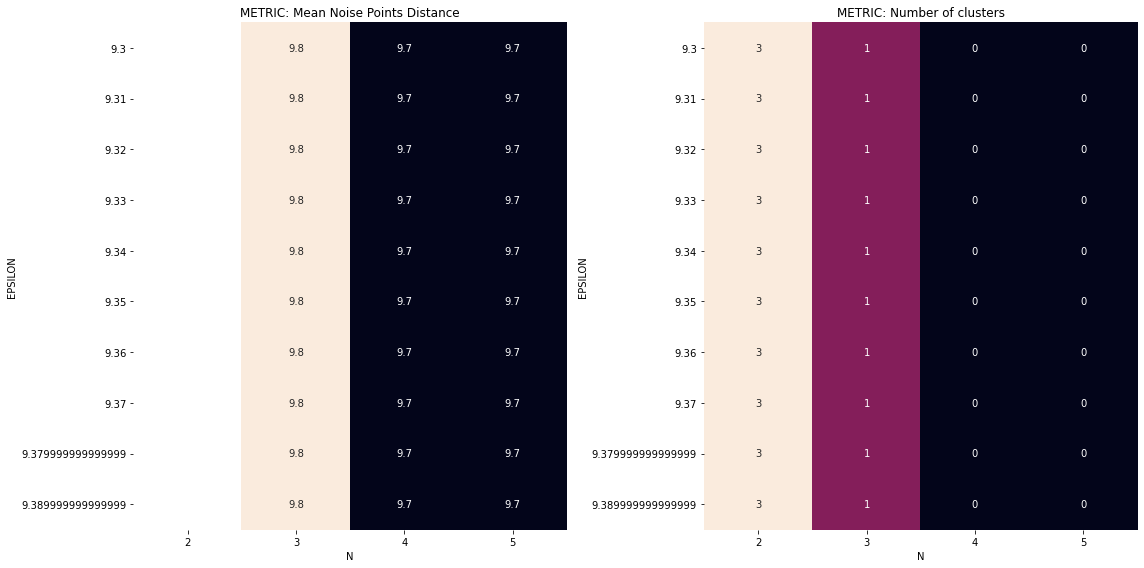

In [198]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [199]:
best_dbscan_model = DBSCAN(eps = 9.3, min_samples = 2)

# Fitting
best_dbscan_model.fit(df_tss_live_scaled)

# Extracting labels
#df_tss_studio_scaled["LABEL"] = best_dbscan_model.labels_

DBSCAN(eps=9.3, min_samples=2)

In [200]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([0, 1, 2]), array([2, 4, 2]))

In [201]:
cluster_insight(df_tss_live_scaled, best_dbscan_model.labels_)

1         2         3         4         5  \
track_date_created                                                     
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live          -0.846761  1.923142 -0.787827 -1.170898       0  
2010_live           0.222109 -1.034166 -1.080695 -1.034166       1  
2011_live           2.970751 -0.026509 -1.290978 -1.525139       1  
2012_live          -0.224082 -0.069844 -1.033832 -1.033832       1  
2013_live           0.345715  1.181285 -1.027009 -1.027009       0  
2014_live          -0.369719 -0.454916 -0.795701 -0.795701       1  
2015_live          -0.214015  2.964861 -0.791993  1.230929       2  
2016_live          -0.140780  2.859141 -0.756148 -0.909991       2  

[8 rows x 54 columns]

Cluster 0
 ['2009_live', '2013_live']

Cluster 1
 ['2010_live', '2011_live', '2012_live', '2014_live']

Cluster 2
 ['2015_live', '2016_live']



<h3>Hierarchical Clustering</h3>

**Single**

In [202]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', \
                                       linkage='single').fit(df_tss_live_scaled.values)

In [203]:
model_single.n_clusters_

8

In [204]:
hist, bins = np.histogram(model_single.labels_, bins=range(0, len(set(model_single.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 6, 1: 2}

Silhouette Score 0.04861023759658356
Separation Score 1.682260077472652
Variance Ratio Criterion Score 1.3281680241475786

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 2, 1: 4, 2: 2}

Silhouette Score 0.0791255366821435
Separation Score 1.4623951741835646
Variance Ratio Criterion Score 1.4978388374243925

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 4, 1: 1, 2: 2, 3: 1}

Silhouette Score 0.03591128611830817
Separation Score 1.0744852721660194
Variance Ratio Criterion Score 1.2968961364374498

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.06999200876942507
Separation Score 0.8940299400804207
Variance Ratio Criterion Score 1.490069322276736

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.04674122147376

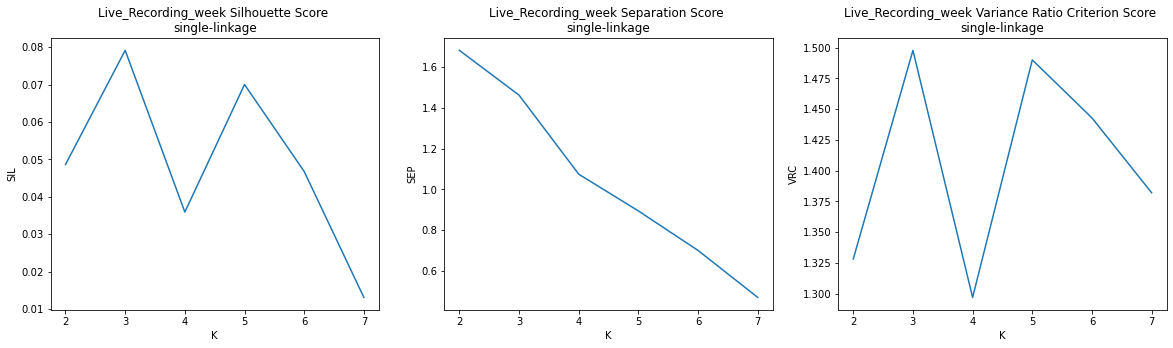

In [205]:
interpret_dendrogram(7, 'single', df_tss_live_scaled.values)

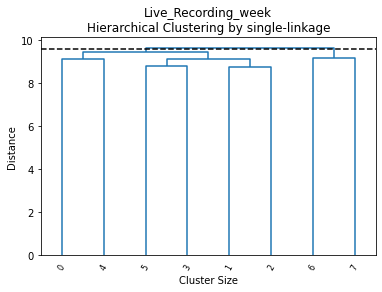

In [209]:
cut_distance = 9.6
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='lastp', 
                p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

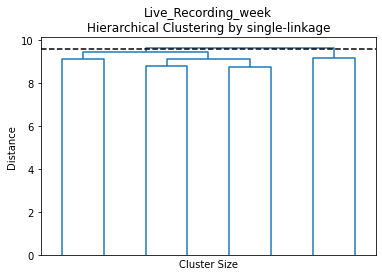

In [210]:
cut_distance = 9.6
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='level', 
                p=30, no_labels=True, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Complete**

In [211]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='complete').fit(df_tss_live_scaled.values)

In [212]:
model_complete.n_clusters_

8

In [213]:
hist, bins = np.histogram(model_complete.labels_, bins=range(0, len(set(model_complete.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 6, 1: 2}

Silhouette Score 0.07331789042806058
Separation Score 1.5530865441002462
Variance Ratio Criterion Score 1.525681656257423

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 4, 1: 2, 2: 2}

Silhouette Score 0.08011982350665114
Separation Score 1.4874808510595205
Variance Ratio Criterion Score 1.535134084917457

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 2, 1: 2, 2: 2, 3: 2}

Silhouette Score 0.09692535455749957
Separation Score 1.1583356148402018
Variance Ratio Criterion Score 1.6085636089146154

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 1, 3: 2, 4: 1}

Silhouette Score 0.06999200876942507
Separation Score 0.8940299400804207
Variance Ratio Criterion Score 1.4900693222767363

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.0467412214737

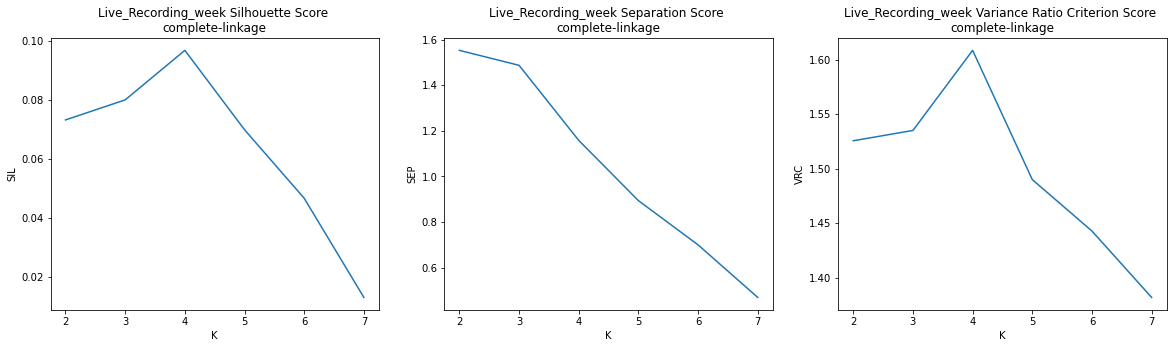

In [214]:
interpret_dendrogram(7, 'complete', df_tss_live_scaled.values)

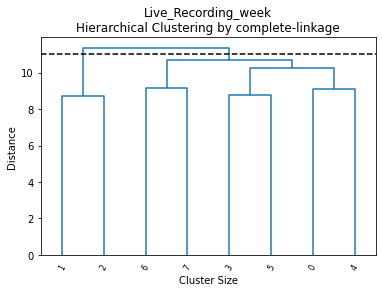

In [216]:
cut_distance = 11
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

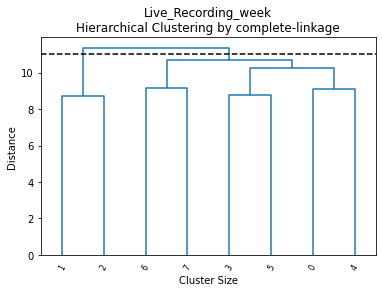

In [217]:
cut_distance = 11
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Average**

In [218]:
model_average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                            linkage='average').fit(df_tss_live_scaled.values)

In [219]:
model_average.n_clusters_

8

In [220]:
hist, bins = np.histogram(model_average.labels_, bins=range(0, len(set(model_average.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 4, 1: 4}

Silhouette Score 0.06046877543144319
Separation Score 1.9843525268144429
Variance Ratio Criterion Score 1.522676414253663

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 4, 1: 2, 2: 2}

Silhouette Score 0.0791255366821435
Separation Score 1.4623951741835646
Variance Ratio Criterion Score 1.4978388374243925

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 2, 1: 2, 2: 2, 3: 2}

Silhouette Score 0.09692535455749957
Separation Score 1.1583356148402018
Variance Ratio Criterion Score 1.6085636089146154

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 1, 3: 2, 4: 1}

Silhouette Score 0.06999200876942507
Separation Score 0.8940299400804207
Variance Ratio Criterion Score 1.4900693222767363

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.0467412214737

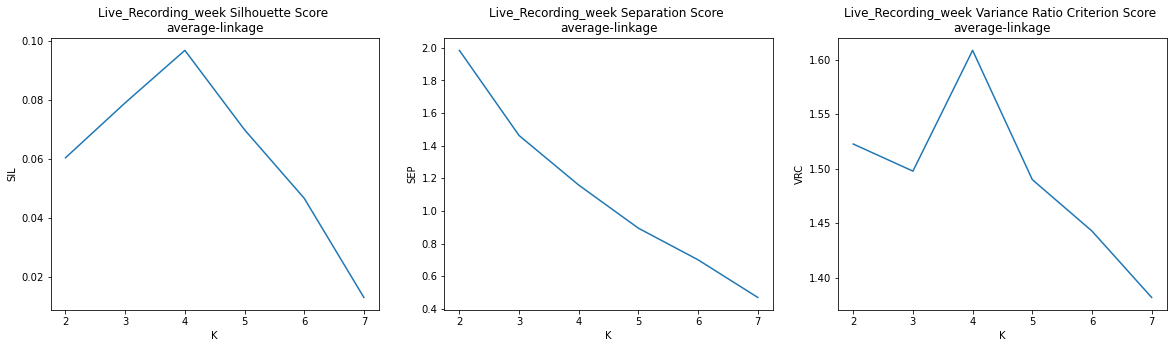

In [221]:
interpret_dendrogram(7, 'average', df_tss_live_scaled.values)

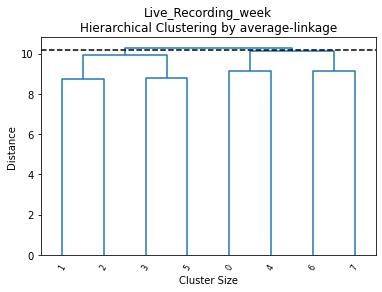

In [224]:
cut_distance = 10.2
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

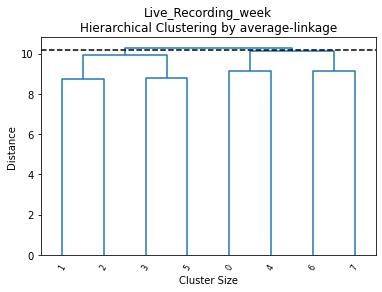

In [225]:
cut_distance = 10.2
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Ward**

In [226]:
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                        linkage='ward').fit(df_tss_live_scaled.values)

In [227]:
model_ward.n_clusters_

8

In [228]:
hist, bins = np.histogram(model_ward.labels_, bins=range(0, len(set(model_ward.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 6, 1: 2}

Silhouette Score 0.07331789042806058
Separation Score 1.5530865441002462
Variance Ratio Criterion Score 1.525681656257423

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 4, 1: 2, 2: 2}

Silhouette Score 0.08011982350665114
Separation Score 1.4874808510595205
Variance Ratio Criterion Score 1.535134084917457

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 2, 1: 2, 2: 2, 3: 2}

Silhouette Score 0.09692535455749957
Separation Score 1.1583356148402018
Variance Ratio Criterion Score 1.6085636089146154

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 1, 3: 2, 4: 1}

Silhouette Score 0.06999200876942507
Separation Score 0.8940299400804207
Variance Ratio Criterion Score 1.4900693222767363

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.0467412214737

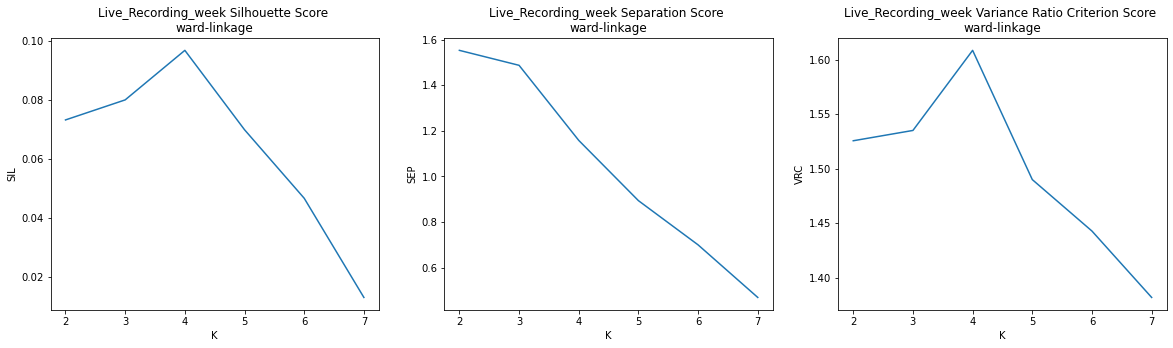

In [229]:
interpret_dendrogram(7, 'ward', df_tss_live_scaled.values)

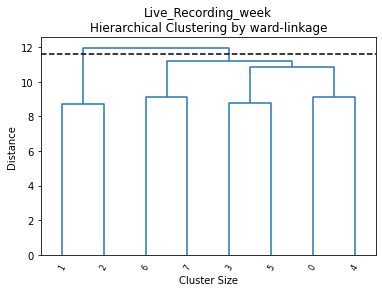

In [233]:
cut_distance = 11.6
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

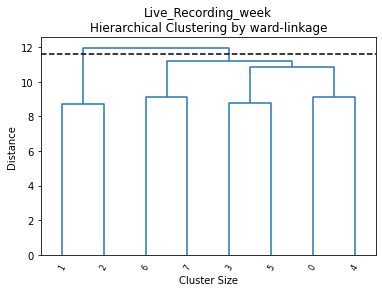

In [234]:
cut_distance = 11.6
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [235]:
F = [list(calculate_features(x).values())for x in tss_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  13.187004847379622 Silhouette Score:  0.6783493192095658
Calinski-Harabaz:  21.621296862777935 Davies-Bouldin:  0.4109750543398069

k:  3 SSE:  1.867041762227783 Silhouette Score:  0.6893955888596387
Calinski-Harabaz:  78.7877227738389 Davies-Bouldin:  0.193034303775673

k:  4 SSE:  0.8275371420409504 Silhouette Score:  0.602433333833525
Calinski-Harabaz:  96.47823497136613 Davies-Bouldin:  0.25202222065899876

k:  5 SSE:  0.3134883839905579 Silhouette Score:  0.4282438530577779
Calinski-Harabaz:  144.48750887661865 Davies-Bouldin:  0.26202146115655267

k:  6 SSE:  0.10742812251137539 Silhouette Score:  0.32933398556577703
Calinski-Harabaz:  225.6377556673114 Davies-Bouldin:  0.1290943234529429

k:  7 SSE:  0.0070688734713258965 Silhouette Score:  0.21573826302126492
Calinski-Harabaz:  1431.1559129096509 Davies-Bouldin:  0.035219915251474034



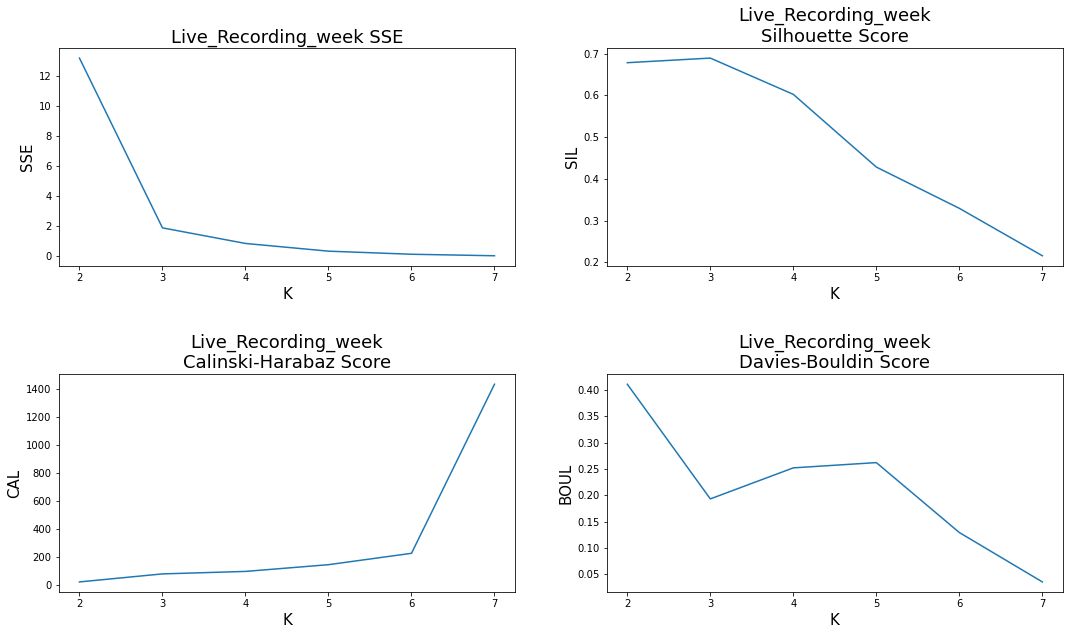

In [236]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [237]:
cluster_centers_live_fb, dict_label_live_fb, labels_live_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  1.867041762227783
Silhouette Score:  0.6893955888596387
Calinski - Harabaz Score:  78.7877227738389
Davies - Bouldin Score:  0.193034303775673


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

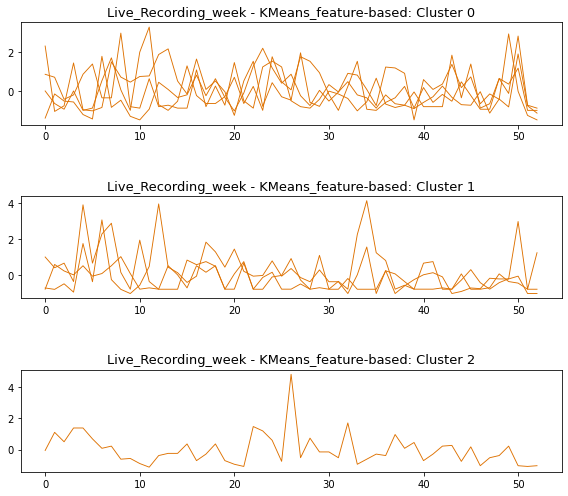

In [238]:
analyze_clusters(labels_live_fb, tss_live_scaled, album_type, 'KMeans_feature-based', False)

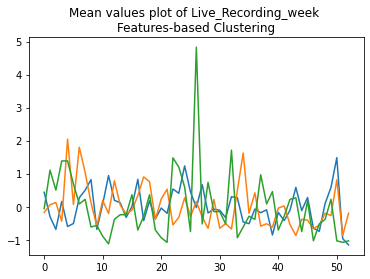

In [239]:
plot_mean_values(labels_live_fb, tss_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [240]:
M = pairwise_distances(tss_live_scaled.reshape(tss_live_scaled.shape[0], tss_live_scaled.shape[1]), \
                       metric=cdm_dist)

In [241]:
print(tss_live_scaled.shape, M.shape)

(8, 53, 1) (8, 8)


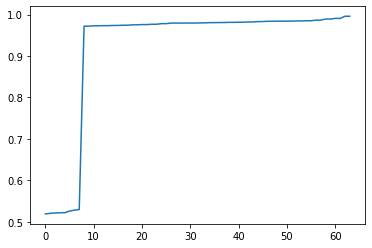

In [242]:
plt.plot(sorted(M.ravel()))
plt.show()

In [243]:
dbscan_compression_live = DBSCAN(eps=0.98, min_samples=5, metric='precomputed')
dbscan_compression_live.fit(M)

DBSCAN(eps=0.98, metric='precomputed')

In [244]:
dbscan_compression_live.labels_

array([0, 0, 0, 0, 0, 0, 0, 0])

<h2>Approximation-based Clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [245]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_live_scaled)

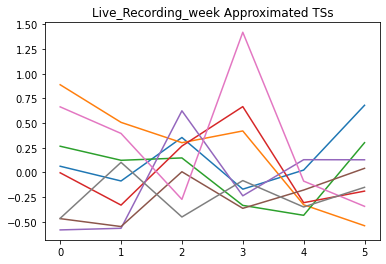

In [246]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " Approximated TSs")
plt.show()

k:  2 SSE:  0.6659973188329665 Silhouette Score:  0.13446581508960373

k:  3 SSE:  0.442890794351779 Silhouette Score:  0.14572528816682434

k:  4 SSE:  0.2879927037167862 Silhouette Score:  0.12166297057133812

k:  5 SSE:  0.19125111731070749 Silhouette Score:  0.09414959863606484

k:  6 SSE:  0.08350289604184988 Silhouette Score:  0.1187941994934963

k:  7 SSE:  0.03589133113390649 Silhouette Score:  0.017694348291777576



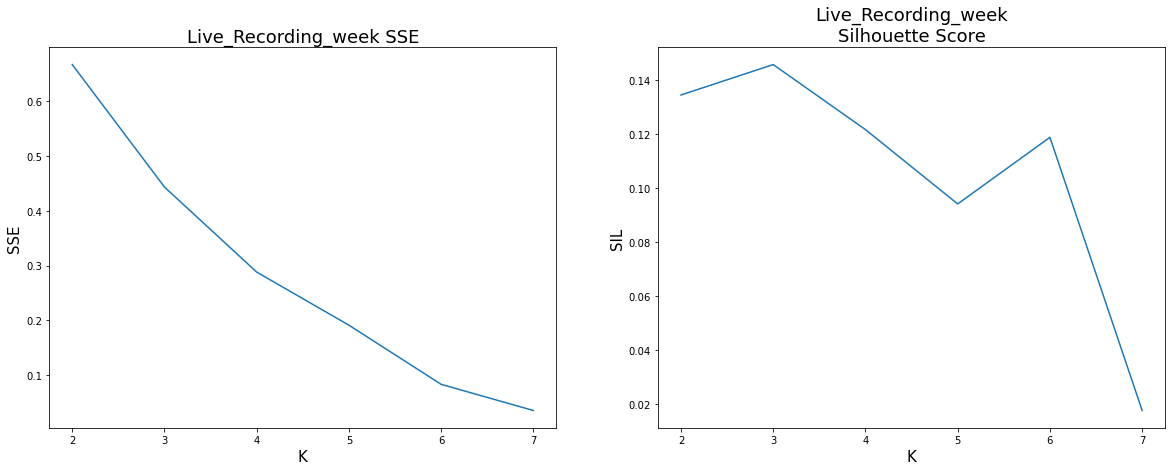

In [247]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [248]:
cluster_centers_live_paa, dict_label_live_paa, labels_live_paa = run_kmeans(3, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 3, 1: 4, 2: 1}

SSE:  0.442890794351779
Silhouette Score:  0.14572528816682434


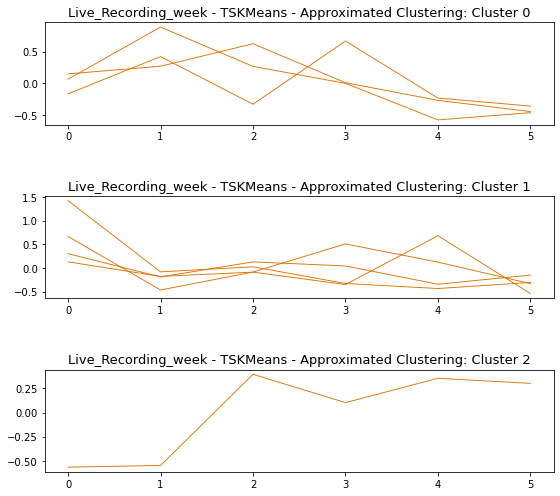

In [249]:
analyze_clusters(labels_live_paa, X_paa, album_type, 'TSKMeans - Approximated Clustering', False)

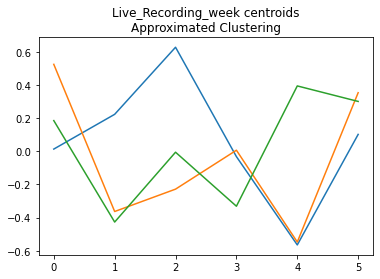

In [250]:
plot_centroids_approximated(cluster_centers_live_paa, X_paa, album_type)

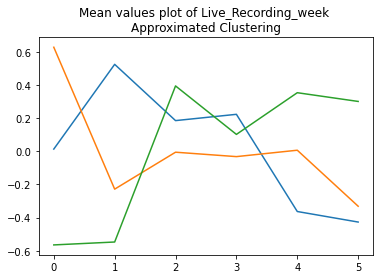

In [251]:
plot_mean_values_approximated(labels_live_paa, X_paa, album_type)

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Studio_Recording and Live_Recording</h1>

In [252]:
album_type = "Studio_Recording_week - Live_Recording_week"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [253]:
df_studio_live

1    2    3    4    5    6    7    8    9   10  ...  \
track_date_created                                                    ...   
2009_studio           2   34   25   36   34   21   16   48   60   85  ...   
2010_studio         183  412  161  149   91  297  254  169  184  288  ...   
2011_studio         345  132  263  253  118  157  318  333  331  117  ...   
2012_studio         212  627  111  159  199  379  189  196  341  197  ...   
2013_studio         448  531  299  126  157  272   84  112  350  261  ...   
2014_studio         212  254  129  139  149  233  324  128  292   57  ...   
2015_studio         150  150   92  136  216  359  290  223  208  148  ...   
2016_studio         434  294  264  246  259  222  348  436  387  150  ...   
2009_live           128   12   22   98   15   13   19  100   73   64  ...   
2010_live            23   48   35   54   54   39   26   29   11   12  ...   
2011_live             2   29   21   20    6    1   71   14   22    4  ...   
2012_live             8    6   14    2   72   17  106   20    6    0  ...   
2013_live            17    6    1   17    0    2   26   46   18    0  ...   
2014_live            21   14   17    5   55   17   36   43   11    0  ...   
2015_live             0   19   14   11   18   10   12   18   25   12  ...   
2016_live            23   21    6    9   23   30    7    7   51    1  ...   

                     44   45   46   47   48   49   50   51   52   53  
track_date_created                                                    
2009_studio         186  141  251   82  175  250  108  187   69  109  
2010_studio         427  222  193  256  303  324  254  289  146   44  
2011_studio         122  128  128  149  115  304   79  249  133    0  
2012_studio         141  144  119  227  281  162  219  232  244    0  
2013_studio         312  224  176  265  368  472  196  383   44    0  
2014_studio         218  117  182  258  196  254  169  383  166    0  
2015_studio         277  322  209  214  179  279  347  197  120   99  
2016_studio         311  228  150  306  100  281  344  242  360   69  
2009_live            37   24   23   47    9   34   20  114   22    9  
2010_live            30    8   28    2   13   16   29    2    1    2  
2011_live            62   36   48   18   29   23   96   32    5    0  
2012_live             0    3    8    7   22   21   21   25    0    0  
2013_live             8   25   13    1    1   28   23   37    0    0  
2014_live             0   10    0    0    1   10    5    4    0    0  
2015_live             0    7   15    5    0    5    8   52    0   28  
2016_live            36    7   30    0    3   20   10   49    2    0  

[16 rows x 53 columns]

In [254]:
df_studio_live.shape

(16, 53)

In [255]:
tss_studio_live = to_time_series_dataset(df_studio_live.values)
tss_studio_live

array([[[  2.],
        [ 34.],
        [ 25.],
        [ 36.],
        [ 34.],
        [ 21.],
        [ 16.],
        [ 48.],
        [ 60.],
        [ 85.],
        [ 64.],
        [ 70.],
        [262.],
        [475.],
        [325.],
        [196.],
        [264.],
        [391.],
        [338.],
        [278.],
        [408.],
        [308.],
        [264.],
        [271.],
        [ 74.],
        [206.],
        [245.],
        [204.],
        [286.],
        [231.],
        [131.],
        [116.],
        [ 88.],
        [ 72.],
        [ 74.],
        [ 36.],
        [ 59.],
        [ 65.],
        [ 89.],
        [106.],
        [ 67.],
        [118.],
        [166.],
        [186.],
        [141.],
        [251.],
        [ 82.],
        [175.],
        [250.],
        [108.],
        [187.],
        [ 69.],
        [109.]],

       [[183.],
        [412.],
        [161.],
        [149.],
        [ 91.],
        [297.],
        [254.],
        [169.],
        [184.],
      

In [256]:
tss_studio_live.shape

(16, 53, 1)

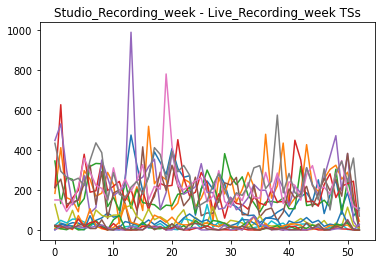

In [257]:
plt.plot(np.squeeze(tss_studio_live).T)
plt.title(album_type + " TSs")
plt.show()

In [258]:
tss_studio_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio_live)
tss_studio_live_scaled

array([[[-1.35604229e+00],
        [-1.07419821e+00],
        [-1.15346685e+00],
        [-1.05658295e+00],
        [-1.07419821e+00],
        [-1.18869737e+00],
        [-1.23273550e+00],
        [-9.50891419e-01],
        [-8.45199888e-01],
        [-6.25009198e-01],
        [-8.09969378e-01],
        [-7.57123612e-01],
        [ 9.33940891e-01],
        [ 2.80996557e+00],
        [ 1.48882143e+00],
        [ 3.52637468e-01],
        [ 9.51556146e-01],
        [ 2.07012485e+00],
        [ 1.60332059e+00],
        [ 1.07486293e+00],
        [ 2.21985452e+00],
        [ 1.33909176e+00],
        [ 9.51556146e-01],
        [ 1.01320954e+00],
        [-7.21893101e-01],
        [ 4.40713744e-01],
        [ 7.84211221e-01],
        [ 4.23098489e-01],
        [ 1.14532395e+00],
        [ 6.60904435e-01],
        [-2.19858327e-01],
        [-3.51972741e-01],
        [-5.98586315e-01],
        [-7.39508357e-01],
        [-7.21893101e-01],
        [-1.05658295e+00],
        [-8.54007516e-01],
 

In [259]:
tss_studio_live_scaled.shape

(16, 53, 1)

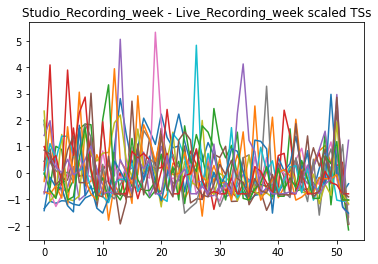

In [260]:
plt.plot(np.squeeze(tss_studio_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [261]:
df_tss_studio_live_scaled = pd.DataFrame(np.squeeze(tss_studio_live_scaled), columns = df_studio_live.columns, \
                                    index = df_studio_live.index)
df_tss_studio_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          44        45        46        47        48  \
track_date_created                                                     
2009_studio         0.264561 -0.131782  0.837057 -0.651432  0.167677   
2010_studio         2.028710  0.050258 -0.229621  0.378391  0.831988   
2011_studio        -0.693567 -0.621397 -0.621397 -0.368798 -0.777767   
2012_studio        -0.594299 -0.565420 -0.806082  0.233579  0.753409   
2013_studio         0.501666 -0.089185 -0.411468  0.186098  0.877662   
2014_studio         0.502241 -0.625957  0.100111  0.949052  0.256495   
2015_studio         0.497993  0.928635 -0.152756 -0.104907 -0.439851   
2016_studio         0.566168 -0.286476 -1.087756  0.514804 -1.601396   
2009_live          -0.345821 -0.728893 -0.758360 -0.051150 -1.170898   
2010_live           0.268637 -0.754994  0.175580 -1.034166 -0.522350   
2011_live           1.378457  0.160820  0.722806 -0.682159 -0.167005   
2012_live          -1.033832 -0.918154 -0.725356 -0.763915 -0.185522   
2013_live          -0.549540  0.465082 -0.251122 -0.967325 -0.967325   
2014_live          -0.795701  0.056262 -0.795701 -0.795701 -0.710504   
2015_live          -0.791993 -0.286262  0.291715 -0.430757 -0.791993   
2016_live           1.859167 -0.371543  1.397641 -0.909991 -0.679227   

                          49        50        

<h3>Euclidean Distance</h3>

k:  2 SSE:  41.517429594320504 Silhouette Score:  0.04888242352134007

k:  3 SSE:  37.3427815321548 Silhouette Score:  0.04358722066221787

k:  4 SSE:  33.19913321913076 Silhouette Score:  0.052339873358774706

k:  5 SSE:  28.839659517499015 Silhouette Score:  0.0634608233997515

k:  6 SSE:  25.92120007056331 Silhouette Score:  0.05243033909810664

k:  7 SSE:  22.786331768843205 Silhouette Score:  0.05309540435772918

k:  8 SSE:  19.704775795872926 Silhouette Score:  0.03002907750637555

k:  9 SSE:  16.53523984765119 Silhouette Score:  0.046912429655460795

k:  10 SSE:  14.051085087537633 Silhouette Score:  0.03291455479694173

k:  11 SSE:  11.189802194676261 Silhouette Score:  0.037444304222117336

k:  12 SSE:  8.764636699141711 Silhouette Score:  0.028095210042409394

k:  13 SSE:  6.543105072435978 Silhouette Score:  0.017537773978974477

k:  14 SSE:  4.02423470023263 Silhouette Score:  0.019087493382068114

k:  15 SSE:  1.924234901374205 Silhouette Score:  0.012774743387340427



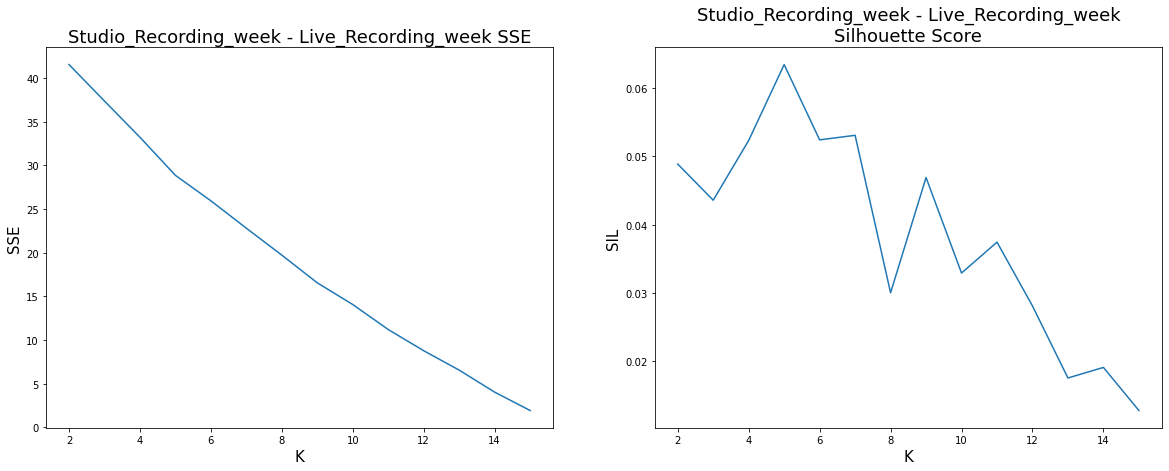

In [262]:
find_optimal_k_kmeans(15, 'euclidean', tss_studio_live_scaled, False, album_type)

**We can see that best k is 5**

In [263]:
cluster_centers_studio_live_eu, dict_label_studio_live_eu, labels_studio_live_eu = run_kmeans(5, 1000, 10, \
                                                            'euclidean', tss_studio_live_scaled, False)

cluster_centers_shape (5, 53, 1)

Labels:  {0: 2, 1: 4, 2: 3, 3: 3, 4: 4}

SSE:  29.81983700597204
Silhouette Score:  0.04561564444050335


In [264]:
cluster_insight(df_tss_studio_live_scaled, labels_studio_live_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        

Cluster 0
 ['2015_live', '2016_live']

Cluster 1
 ['2009_studio', '2014_studio', '2015_studio', '2012_live']

Cluster 2
 ['2010_studio', '2010_live', '2011_live']

Cluster 3
 ['2012_studio', '2016_studio', '2014_live']

Cluster 4
 ['2011_studio', '2013_studio', '2009_live', '2013_live']



**Centroids**

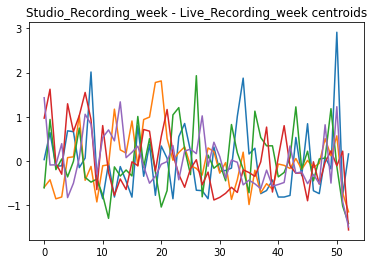

In [265]:
plot_kmeans_centroids(cluster_centers_studio_live_eu, album_type)

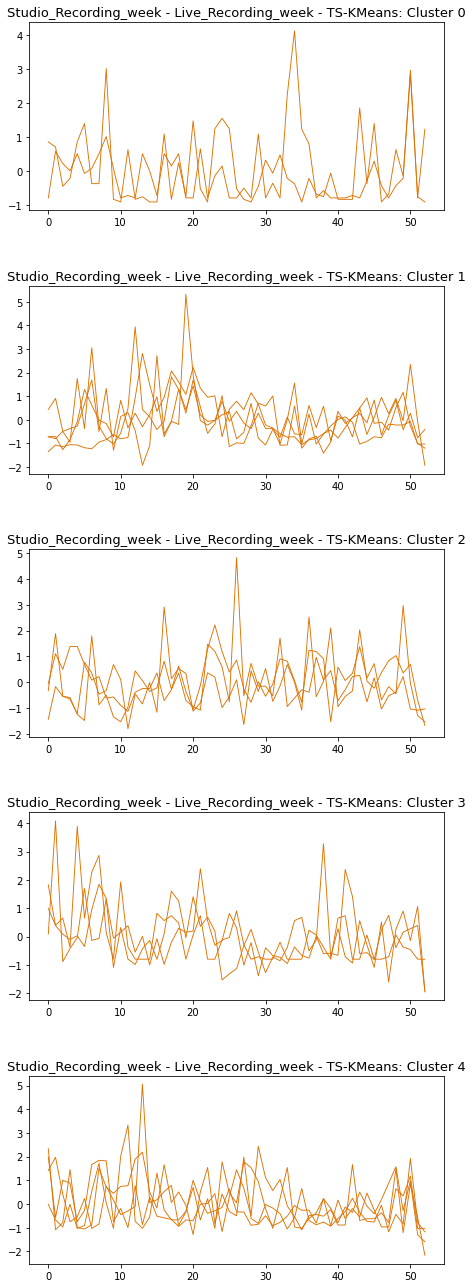

In [266]:
analyze_clusters(labels_studio_live_eu, tss_studio_live_scaled, album_type, 'TS-KMeans', True)

<h3>DTW distance</h3>

k:  2 SSE:  15.506706553824602 Silhouette Score:  0.03829348391066473

k:  3 SSE:  13.537055153631872 Silhouette Score:  0.03552345994583472

k:  4 SSE:  11.539699163946615 Silhouette Score:  0.054453175661766384

k:  5 SSE:  10.119045491680588 Silhouette Score:  0.059495436514056664

k:  6 SSE:  8.764621557423668 Silhouette Score:  0.061366701290454725

k:  7 SSE:  7.49082694547057 Silhouette Score:  0.06165065538258364

k:  8 SSE:  6.407046875132163 Silhouette Score:  0.05934232542150647

k:  9 SSE:  5.503587185287428 Silhouette Score:  0.050131687228177166

k:  10 SSE:  4.296604851109006 Silhouette Score:  0.05243466088295778

k:  11 SSE:  3.3536458870001264 Silhouette Score:  0.036802563367728934

k:  12 SSE:  2.5830100785547288 Silhouette Score:  0.04368942198265091

k:  13 SSE:  1.7093781371679193 Silhouette Score:  0.03399162852177491

k:  14 SSE:  1.121782067120941 Silhouette Score:  0.027041285846173813

k:  15 SSE:  0.47546936115307303 Silhouette Score:  0.019317102636773307


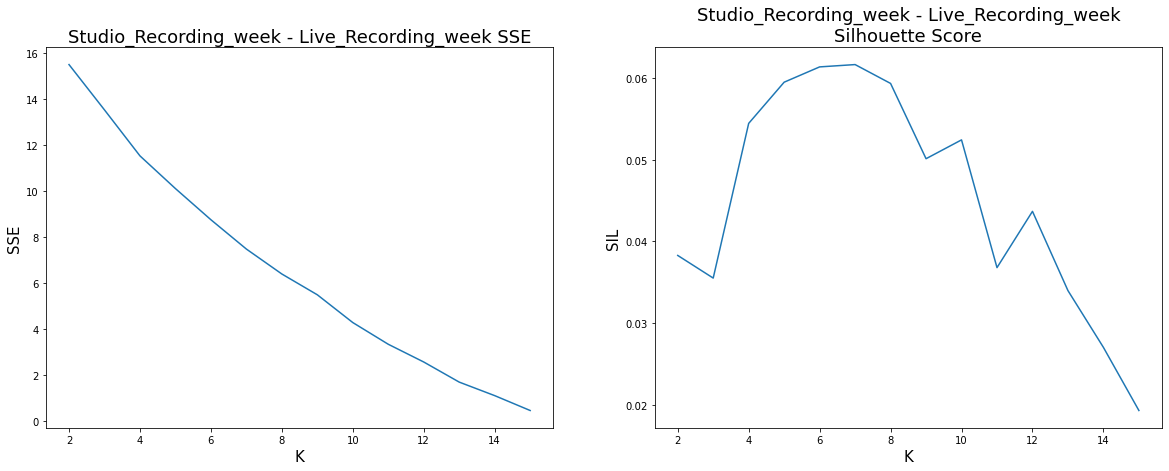

In [267]:
find_optimal_k_kmeans(15, 'dtw', tss_studio_live_scaled, False, album_type)

**We can see that best k is 7**

In [268]:
cluster_centers_studio_live_dtw, dict_label_studio_live_dtw, labels_studio_live_dtw = run_kmeans(7, 1000, 10, 'dtw',\
                                                                    tss_studio_live_scaled, False)

cluster_centers_shape (7, 53, 1)

Labels:  {0: 2, 1: 4, 2: 5, 3: 2, 4: 1, 5: 1, 6: 1}

SSE:  7.3135026792536415
Silhouette Score:  0.043580118783409755


In [269]:
cluster_insight(df_tss_studio_live_scaled, labels_studio_live_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        

Cluster 0
 ['2010_studio', '2012_studio']

Cluster 1
 ['2013_studio', '2015_studio', '2010_live', '2012_live']

Cluster 2
 ['2011_studio', '2014_studio', '2013_live', '2014_live', '2016_live']

Cluster 3
 ['2016_studio', '2009_live']

Cluster 4
 ['2009_studio']

Cluster 5
 ['2015_live']

Cluster 6
 ['2011_live']



**Centroids**

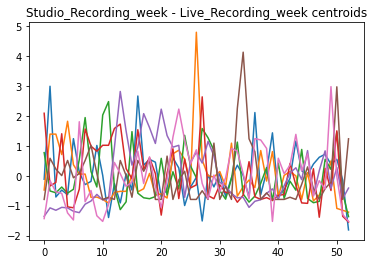

In [270]:
plot_kmeans_centroids(cluster_centers_studio_live_dtw, album_type)

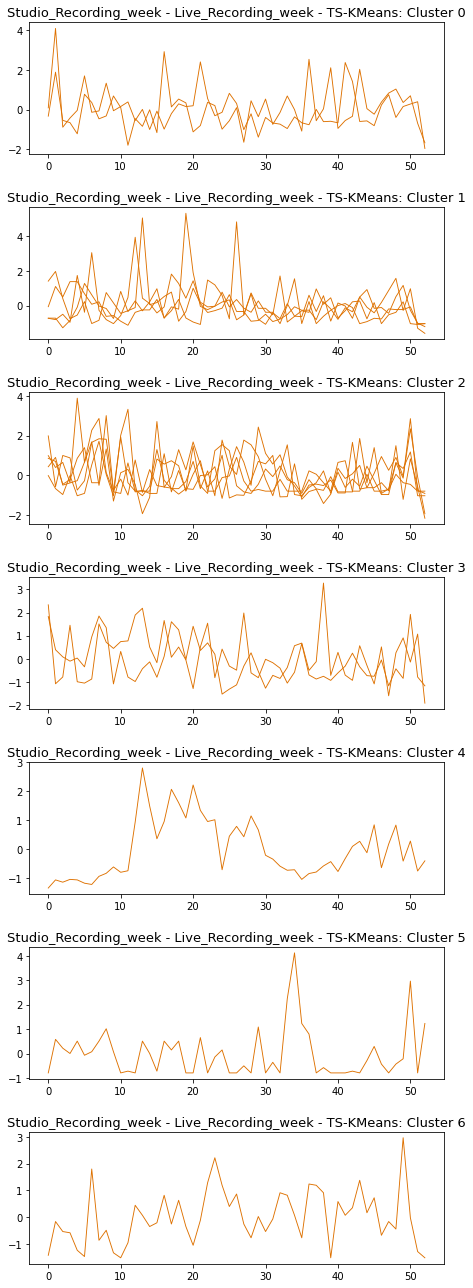

In [271]:
analyze_clusters(labels_studio_live_dtw, tss_studio_live_scaled, album_type, 'TS-KMeans', True)

<h3>KMeans sklearn</h3>

k:  2 SSE:  669.7778443748809 Silhouette Score:  0.03914530473073291
Calinski-Harabaz:  1.6602556382295697 Davies-Bouldin:  2.8723749050519634

k:  3 SSE:  604.6542588501272 Silhouette Score:  0.03144635552558203
Calinski-Harabaz:  1.5539296059770773 Davies-Bouldin:  2.4460909670245554

k:  4 SSE:  533.1292551287568 Silhouette Score:  0.05222098597411118
Calinski-Harabaz:  1.6212003603943987 Davies-Bouldin:  2.0866888655388225

k:  5 SSE:  480.36922641040445 Silhouette Score:  0.043205699933263064
Calinski-Harabaz:  1.539030208344416 Davies-Bouldin:  1.6877048987982437

k:  6 SSE:  402.0342414328665 Silhouette Score:  0.06953460021345947
Calinski-Harabaz:  1.7270785075243247 Davies-Bouldin:  1.4745466968680094

k:  7 SSE:  367.48697499366904 Silhouette Score:  0.04419637798384621
Calinski-Harabaz:  1.5580944682986995 Davies-Bouldin:  1.3930043250205817

k:  8 SSE:  318.12414462947186 Silhouette Score:  0.036294759277901725
Calinski-Harabaz:  1.5486584733472097 Davies-Bouldin:  1.193672

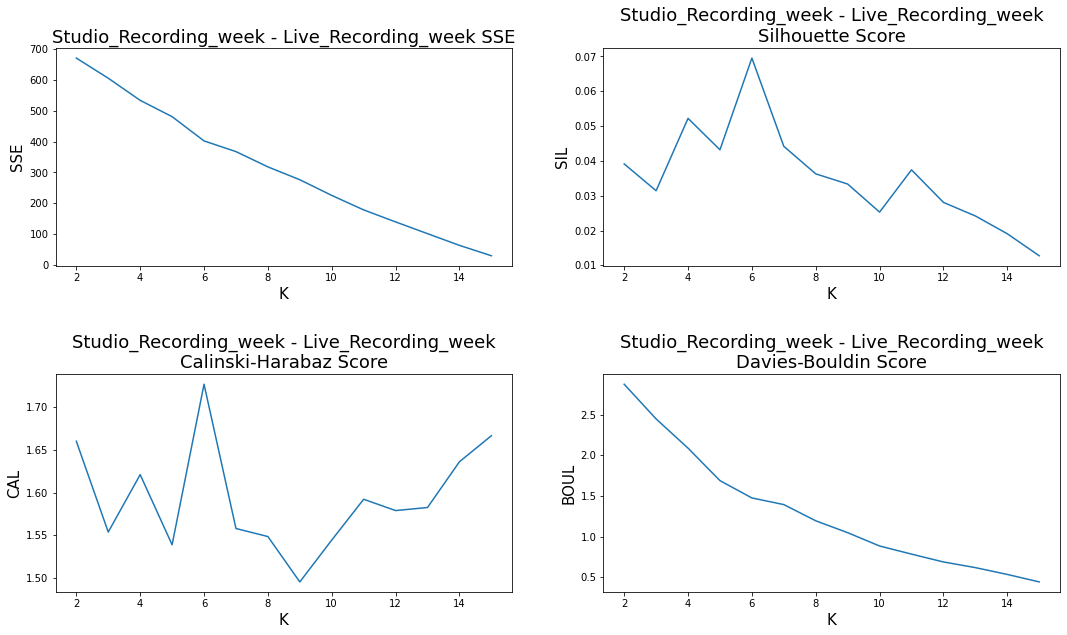

In [272]:
find_optimal_k_kmeans(15, "", df_tss_studio_live_scaled, True, album_type)

In [273]:
cluster_centers_studio_live_2, dict_label_studio_live_2, labels_studio_live_2 = run_kmeans(6, 1000, 10, '', \
                                                                        df_tss_studio_live_scaled, True)

cluster_centers_shape (6, 53)

Labels:  {0: 2, 1: 5, 2: 2, 3: 2, 4: 2, 5: 3}

SSE:  418.11674409221206
Silhouette Score:  0.05472525389911843
Calinski - Harabaz Score:  1.583719623060157
Davies - Bouldin Score:  1.606228166306539


In [274]:
cluster_insight(df_tss_studio_live_scaled, labels_studio_live_2)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        

Cluster 0
 ['2012_live', '2015_live']

Cluster 1
 ['2012_studio', '2014_studio', '2015_studio', '2013_live', '2016_live']

Cluster 2
 ['2010_studio', '2011_live']

Cluster 3
 ['2011_studio', '2010_live']

Cluster 4
 ['2016_studio', '2014_live']

Cluster 5
 ['2009_studio', '2013_studio', '2009_live']



<h3>DBSCAN</h3>

In [275]:
dist = pdist(df_tss_studio_live_scaled, 'euclidean') #pair wise distance
#print (dist)
dist = squareform(dist) #distance matrix given the vector dist
#print()
#print(dist)

In [276]:
k = 4
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

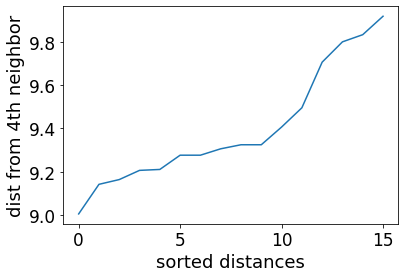

In [277]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(labelsize=17)
plt.show()

In [280]:
eps_to_test = np.arange(9.3, 9.41, 0.01)
min_samples_to_test = [2, 3, 4, 5, 6, 7, 8]

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [9.3  9.31 9.32 9.33 9.34 9.35 9.36 9.37 9.38 9.39 9.4 ]
min_samples: [2, 3, 4, 5, 6, 7, 8]


In [281]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

In [282]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_tss_studio_live_scaled, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 9.3 and min_samples =   2 |  None    1
  2 | Tested with eps = 9.3 and min_samples =   3 |  None    1
  3 | Tested with eps = 9.3 and min_samples =   4 |  None    1
  4 | Tested with eps = 9.3 and min_samples =   5 |  None    1
  5 | Tested with eps = 9.3 and min_samples =   6 |  9.29    1
  6 | Tested with eps = 9.3 and min_samples =   7 | 9.213    1
  7 | Tested with eps = 9.3 and min_samples =   8 |  9.14    0
  8 | Tested with eps = 9.31 and min_samples =   2 |  None    1
  9 | Tested with eps = 9.31 and min_samples =   3 |  None    1
 10 | Tested with eps = 9.31 and min_samples =   4 |  None    1
 11 | Tested with eps = 9.31 and min_samples =   5 |  None    1
 12 | Tested with eps = 9.31 and min_samples =   6 |  9.29    1
 13 | Tested with eps = 9.31 and min_samples =   7 | 9.213    1
 14 | Tested with eps = 9.31 and min_sample

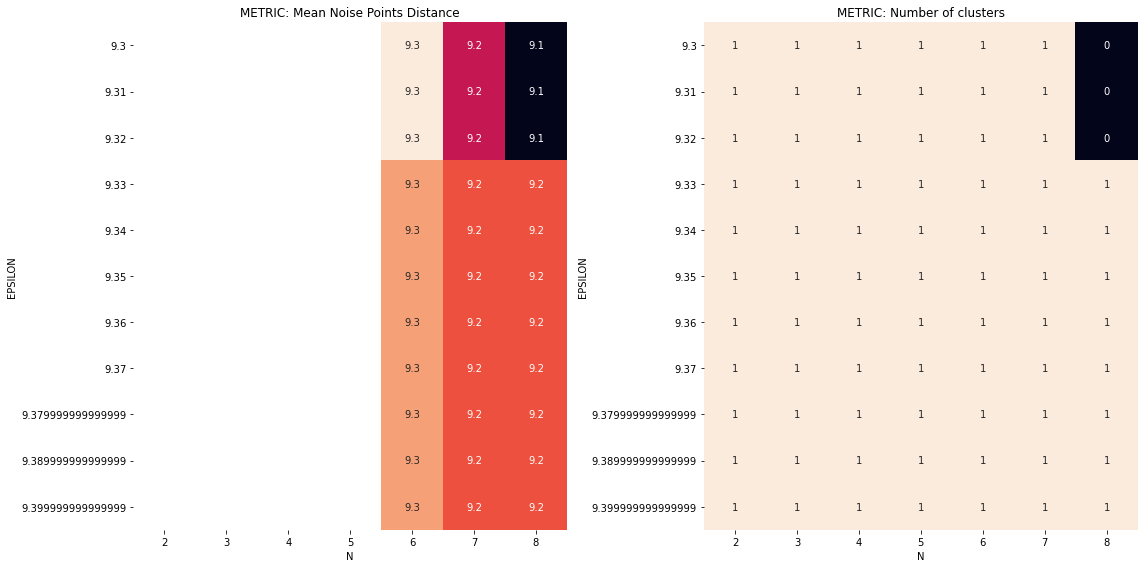

In [283]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [284]:
best_dbscan_model = DBSCAN(eps = 9.32, min_samples = 2)

# Fitting
best_dbscan_model.fit(df_tss_studio_live_scaled)

# Extracting labels
#df_tss_studio_scaled["LABEL"] = best_dbscan_model.labels_

DBSCAN(eps=9.32, min_samples=2)

In [285]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([0]), array([16]))

In [286]:
cluster_insight(df_tss_studio_live_scaled, best_dbscan_model.labels_)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        

Cluster 0
 ['2009_studio', '2010_studio', '2011_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2016_studio', '2009_live', '2010_live', '2011_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']



<h3>Hierarchical Clustering</h3>

**Single**

In [287]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', \
                                       linkage='single').fit(df_tss_studio_live_scaled.values)

In [288]:
model_single.n_clusters_

16

In [289]:
hist, bins = np.histogram(model_single.labels_, bins=range(0, len(set(model_single.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 15, 1: 1}

Silhouette Score 0.03328570669703469
Separation Score 0.8735729416220868
Variance Ratio Criterion Score 1.1455280182704246

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 14, 1: 1, 2: 1}

Silhouette Score -0.009748248328624916
Separation Score 0.8910511790344658
Variance Ratio Criterion Score 1.108080799359919

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 13, 1: 1, 2: 1, 3: 1}

Silhouette Score -0.03175053824926255
Separation Score 0.8963478284097595
Variance Ratio Criterion Score 1.090764723558254

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 11, 1: 2, 2: 1, 3: 1, 4: 1}

Silhouette Score -0.009619289470537357
Separation Score 1.1837793107288357
Variance Ratio Criterion Score 1.2458081474181546

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 10, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score -0.01

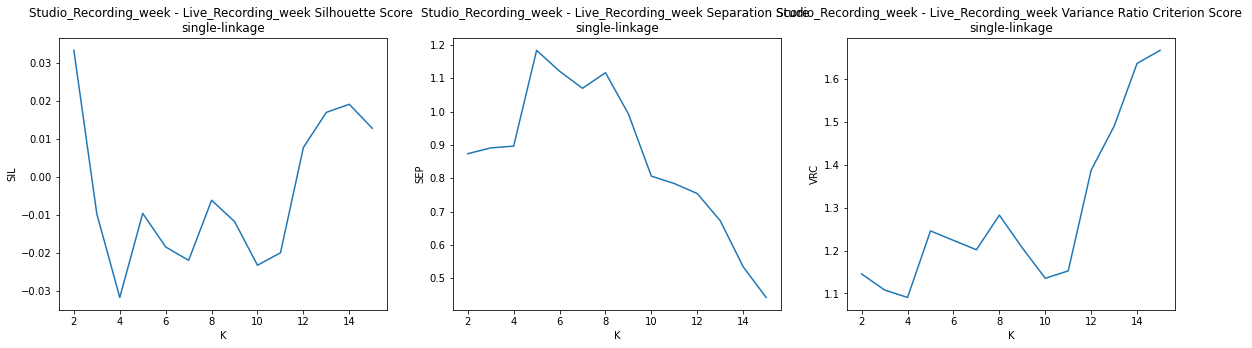

In [290]:
interpret_dendrogram(15, 'single', df_tss_studio_live_scaled.values)

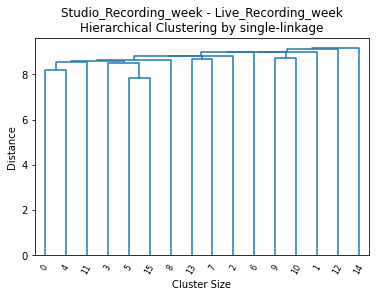

In [292]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='lastp', 
                p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

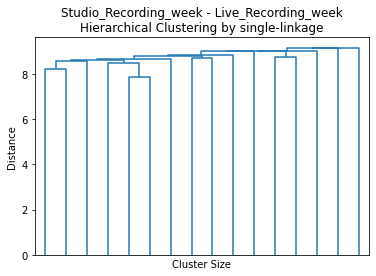

In [293]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='level', 
                p=30, no_labels=True, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Complete**

In [294]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='complete').fit(df_tss_studio_live_scaled.values)

In [295]:
model_complete.n_clusters_

16

In [296]:
hist, bins = np.histogram(model_complete.labels_, bins=range(0, len(set(model_complete.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 11, 1: 5}

Silhouette Score 0.0424009508308576
Separation Score 2.660111785914376
Variance Ratio Criterion Score 1.648221753267851

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 5, 1: 4, 2: 7}

Silhouette Score 0.035935833996032826
Separation Score 2.3899578412536124
Variance Ratio Criterion Score 1.5951426325522602

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 4, 1: 3, 2: 7, 3: 2}

Silhouette Score 0.045550688390421167
Separation Score 2.0274576876604122
Variance Ratio Criterion Score 1.6402213508431047

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 7, 1: 3, 2: 3, 3: 2, 4: 1}

Silhouette Score 0.050197786255036986
Separation Score 1.6199046223250235
Variance Ratio Criterion Score 1.6255600076955732

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 4, 1: 3, 2: 3, 3: 2, 4: 1, 5: 3}

Silhouette Score 0.0610545553

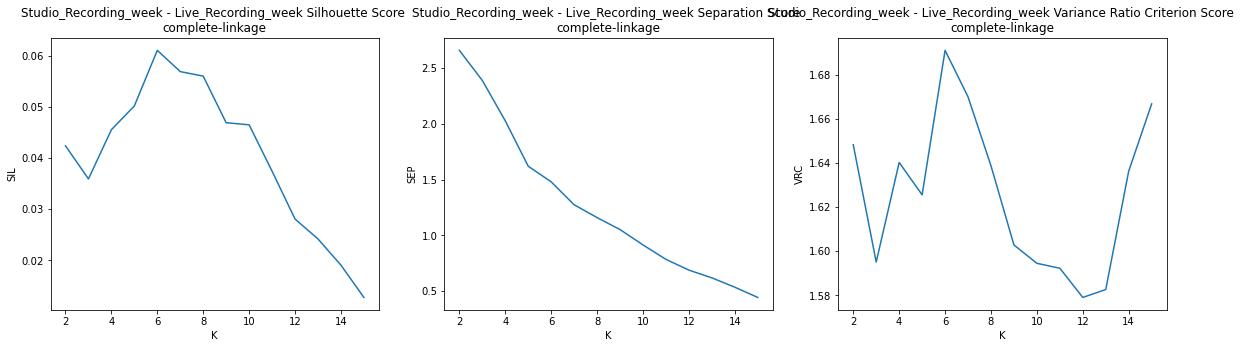

In [297]:
interpret_dendrogram(15, 'complete', df_tss_studio_live_scaled.values)

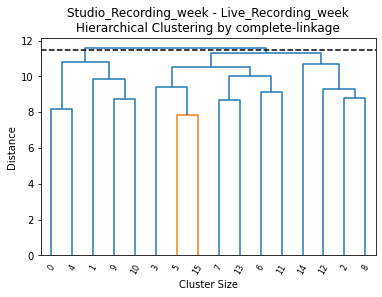

In [301]:
cut_distance = 11.5
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

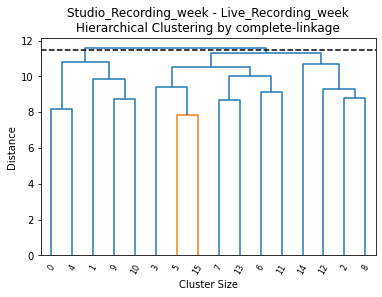

In [302]:
cut_distance = 11.5
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Average**

In [303]:
model_average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='average').fit(df_tss_studio_live_scaled.values)

In [304]:
model_average.n_clusters_

16

In [305]:
hist, bins = np.histogram(model_average.labels_, bins=range(0, len(set(model_average.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 13, 1: 3}

Silhouette Score 0.053746785253689235
Separation Score 2.0957112618530176
Variance Ratio Criterion Score 1.6736808864209431

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 12, 1: 3, 2: 1}

Silhouette Score 0.03360053942390606
Separation Score 1.6579541085623848
Variance Ratio Criterion Score 1.452686604936472

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 8, 1: 4, 2: 1, 3: 3}

Silhouette Score 0.043994994893158404
Separation Score 1.7796710520748393
Variance Ratio Criterion Score 1.6059234235765427

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 5, 1: 4, 2: 1, 3: 3, 4: 3}

Silhouette Score 0.054344913941626216
Separation Score 1.6504715863243604
Variance Ratio Criterion Score 1.6697872190831913

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 4, 1: 3, 2: 2, 3: 3, 4: 3, 5: 1}

Silhouette Score 0.0607843

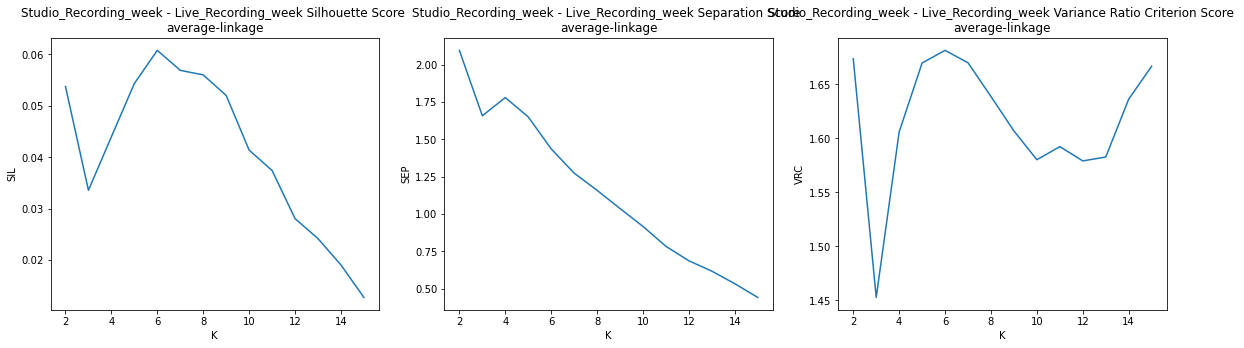

In [306]:
interpret_dendrogram(15, 'average', df_tss_studio_live_scaled.values)

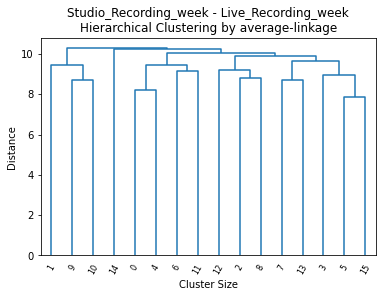

In [308]:
cut_distance = ""
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

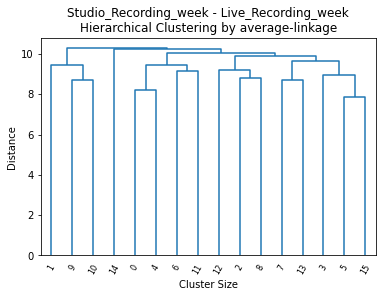

In [309]:
cut_distance = ""
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Ward**

In [310]:
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='ward').fit(df_tss_studio_live_scaled.values)

In [311]:
model_ward.n_clusters_

16

In [312]:
hist, bins = np.histogram(model_ward.labels_, bins=range(0, len(set(model_ward.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 13, 1: 3}

Silhouette Score 0.053746785253689235
Separation Score 2.0957112618530176
Variance Ratio Criterion Score 1.6736808864209431

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 10, 1: 3, 2: 3}

Silhouette Score 0.04851332767903123
Separation Score 2.0929452654898477
Variance Ratio Criterion Score 1.653278184530427

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 8, 1: 3, 2: 3, 3: 2}

Silhouette Score 0.051411518684952515
Separation Score 1.8987668768684742
Variance Ratio Criterion Score 1.6758550939211327

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 4, 1: 4, 2: 3, 3: 2, 4: 3}

Silhouette Score 0.06161625306600703
Separation Score 1.7418119288916807
Variance Ratio Criterion Score 1.7102276490809765

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 4, 1: 3, 2: 3, 3: 2, 4: 3, 5: 1}

Silhouette Score 0.06105455

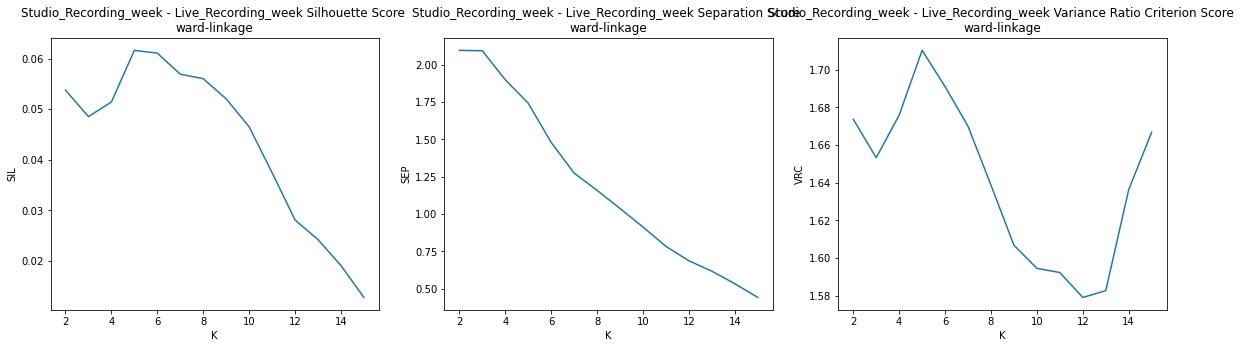

In [313]:
interpret_dendrogram(15, 'ward', df_tss_studio_live_scaled.values)

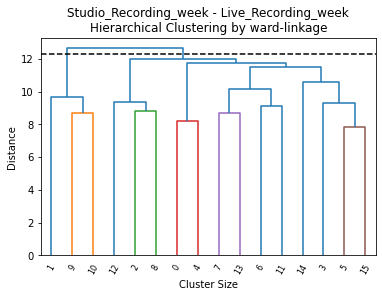

In [317]:
cut_distance = 12.3
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

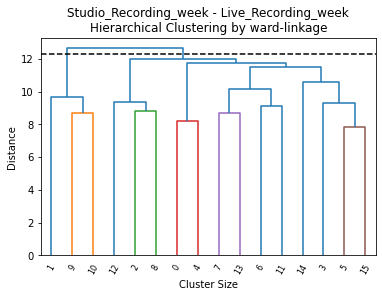

In [318]:
cut_distance = 12.3
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [319]:
F = [list(calculate_features(x).values())for x in tss_studio_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  60.2059759649713 Silhouette Score:  0.6981127328266522
Calinski-Harabaz:  45.511431963569805 Davies-Bouldin:  0.37751150704474573

k:  3 SSE:  14.991556356080887 Silhouette Score:  0.7482990545513152
Calinski-Harabaz:  104.46310493859883 Davies-Bouldin:  0.28857131114537443

k:  4 SSE:  5.841843894706429 Silhouette Score:  0.7056030372289128
Calinski-Harabaz:  171.2354666006534 Davies-Bouldin:  0.2757294673252698

k:  5 SSE:  3.4449775411575287 Silhouette Score:  0.6642532045526204
Calinski-Harabaz:  201.5452478124867 Davies-Bouldin:  0.12624937632831643

k:  6 SSE:  1.2209413369092266 Silhouette Score:  0.5616571419507888
Calinski-Harabaz:  417.2249904850131 Davies-Bouldin:  0.2148812388820582

k:  7 SSE:  0.7997524744291452 Silhouette Score:  0.41035019251973015
Calinski-Harabaz:  478.50706785610345 Davies-Bouldin:  0.37020582718975653

k:  8 SSE:  0.5037806917790875 Silhouette Score:  0.38067421476921126
Calinski-Harabaz:  579.4375747804623 Davies-Bouldin:  0.37217363128

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  9 SSE:  0.3034637720430286 Silhouette Score:  0.3828529792539024
Calinski-Harabaz:  737.0516020615133 Davies-Bouldin:  0.2378035749974497

k:  10 SSE:  0.13515148375986158 Silhouette Score:  0.38875545300830805
Calinski-Harabaz:  1261.7417709104059 Davies-Bouldin:  0.24775961624588122

k:  11 SSE:  0.09730921538018587 Silhouette Score:  0.33488659300360235
Calinski-Harabaz:  1314.5068016393457 Davies-Bouldin:  0.1654773303680369

k:  12 SSE:  0.06637855278158368 Silhouette Score:  0.23563102118960716
Calinski-Harabaz:  1401.647593577269 Davies-Bouldin:  0.1848788436453901

k:  13 SSE:  0.043310097603346615 Silhouette Score:  0.22250887923965196
Calinski-Harabaz:  1477.029978205875 Davies-Bouldin:  0.13262075127259362



<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  14 SSE:  0.02181055751500281 Silhouette Score:  0.15935016669584975
Calinski-Harabaz:  1805.0732430893208 Davies-Bouldin:  0.09269454795462033

k:  15 SSE:  0.0070688734713258965 Silhouette Score:  0.07919207257439495
Calinski-Harabaz:  2585.9595424008667 Davies-Bouldin:  0.056158316184127983



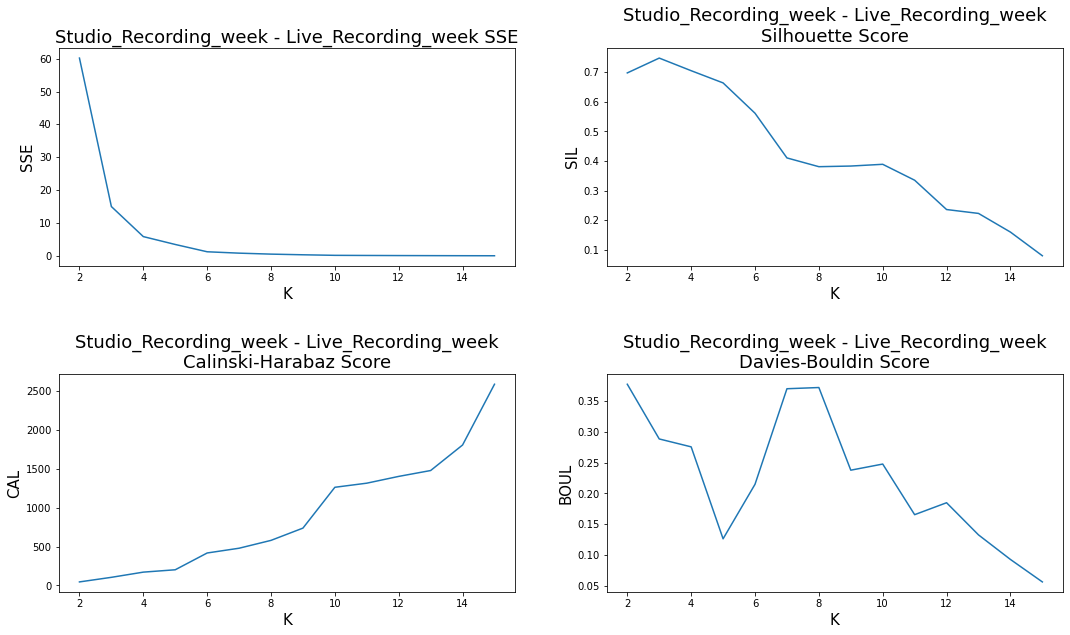

In [320]:
find_optimal_k_kmeans(15, "", F, True, album_type)

In [321]:
cluster_centers_studio_live_fb, dict_label_studio_live_fb, labels_studio_live_fb = run_kmeans(3, 1000, 10, "", F, \
                                                                                              True)

cluster_centers_shape (3, 5)

Labels:  {0: 9, 1: 3, 2: 4}

SSE:  14.991556356080887
Silhouette Score:  0.7482990545513152
Calinski - Harabaz Score:  104.46310493859883
Davies - Bouldin Score:  0.28857131114537443


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

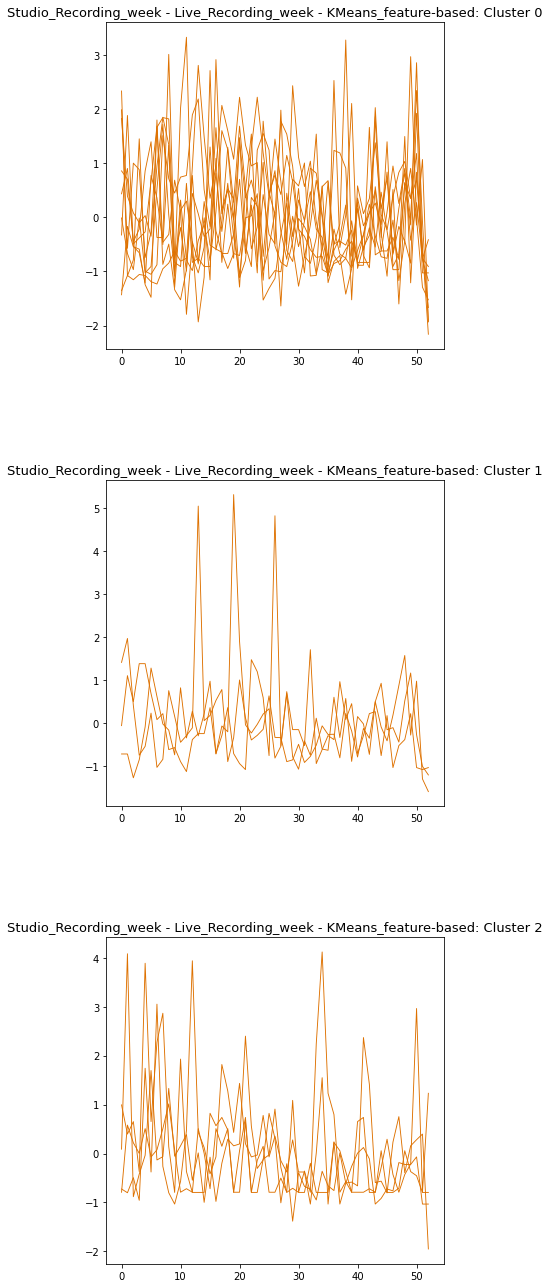

In [322]:
analyze_clusters(labels_studio_live_fb, tss_studio_live_scaled, album_type, 'KMeans_feature-based', True)

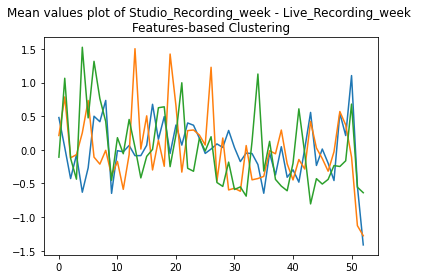

In [323]:
plot_mean_values(labels_studio_live_fb, tss_studio_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [324]:
M = pairwise_distances(tss_studio_live_scaled.reshape(tss_studio_live_scaled.shape[0], \
                                        tss_studio_live_scaled.shape[1]), metric=cdm_dist)

In [325]:
print(tss_studio_live_scaled.shape, M.shape)

(16, 53, 1) (16, 16)


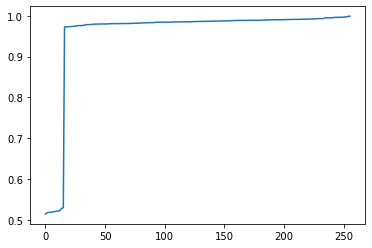

In [326]:
plt.plot(sorted(M.ravel()))
plt.show()

In [327]:
dbscan_compression_studio_live = DBSCAN(eps=0.98, min_samples=5, metric='precomputed')
dbscan_compression_studio_live.fit(M)

DBSCAN(eps=0.98, metric='precomputed')

In [328]:
dbscan_compression_studio_live.labels_

array([ 0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0])

<h2>Approximation-based Clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [329]:
n_paa_segments = 8
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_live_scaled)

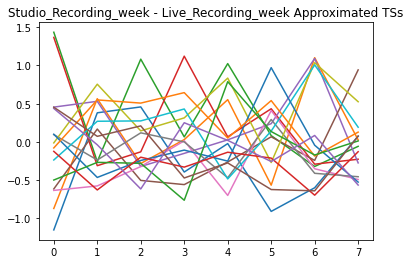

In [330]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " Approximated TSs")
plt.show()

k:  2 SSE:  1.367591151808329 Silhouette Score:  0.1817759962972524

k:  3 SSE:  1.1291434858378997 Silhouette Score:  0.13845874741371633

k:  4 SSE:  0.9355568711554035 Silhouette Score:  0.1587447315318249

k:  5 SSE:  0.743202766904873 Silhouette Score:  0.1570306231217472

k:  6 SSE:  0.599013368403462 Silhouette Score:  0.15014140549547766

k:  7 SSE:  0.48241157891066316 Silhouette Score:  0.1442059307201613

k:  8 SSE:  0.40212297417576953 Silhouette Score:  0.13078780521553543

k:  9 SSE:  0.3305391647792935 Silhouette Score:  0.1017416034621499

k:  10 SSE:  0.2418177808900016 Silhouette Score:  0.10719236601236826

k:  11 SSE:  0.1768025215997003 Silhouette Score:  0.10456439569137238

k:  12 SSE:  0.12013015774630256 Silhouette Score:  0.09304298684783953

k:  13 SSE:  0.06935259090082133 Silhouette Score:  0.07823388504756816

k:  14 SSE:  0.03684074116121682 Silhouette Score:  0.07912395585541185

k:  15 SSE:  0.015221398795304647 Silhouette Score:  0.03300914538047697



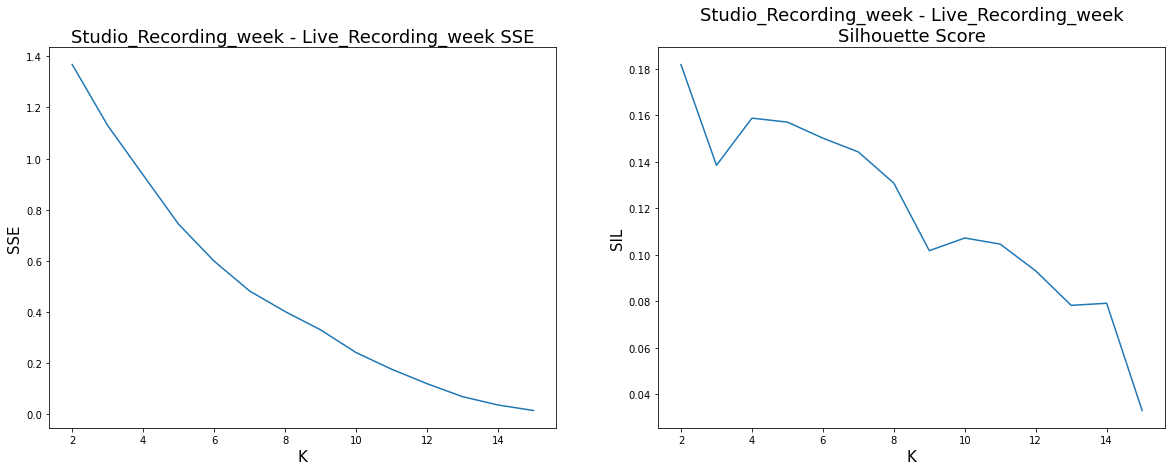

In [331]:
find_optimal_k_kmeans(15, 'euclidean', X_paa, False, album_type)

In [332]:
cluster_centers_studio_live_paa, dict_label_studio_live_paa, labels_studio_live_paa = run_kmeans(4, 1000, 10, \
                                                                'euclidean', X_paa, False)

cluster_centers_shape (4, 8, 1)

Labels:  {0: 6, 1: 3, 2: 6, 3: 1}

SSE:  0.9172139452372384
Silhouette Score:  0.15388231866345986


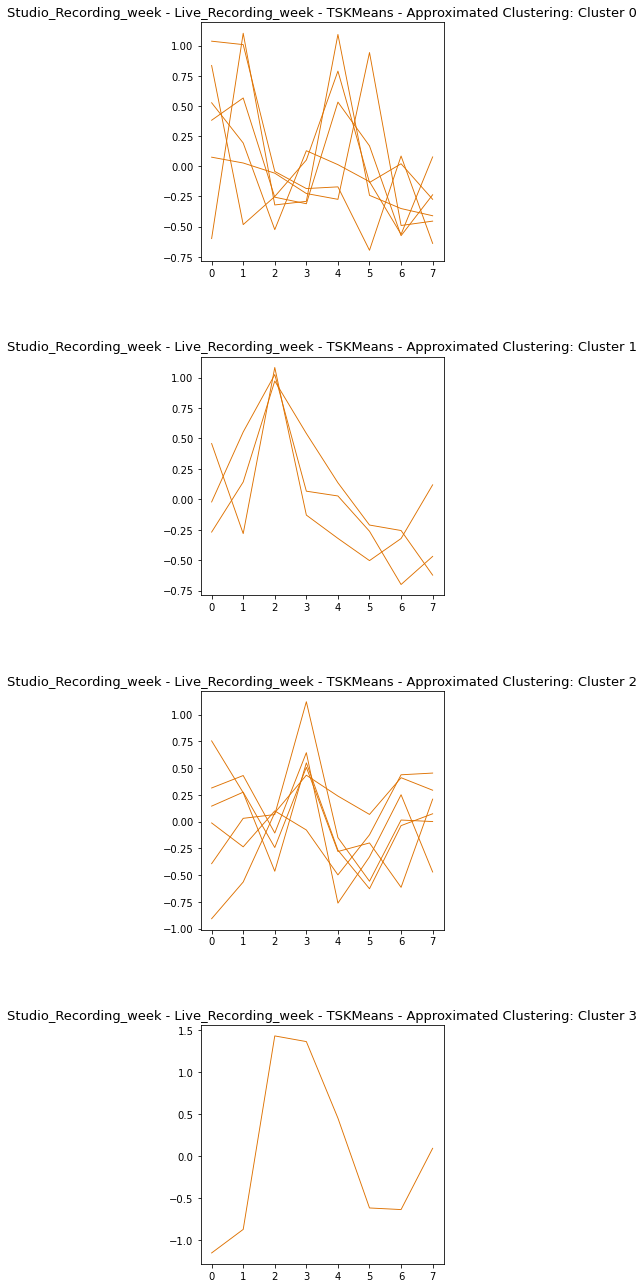

In [333]:
analyze_clusters(labels_studio_live_paa, X_paa, album_type, 'TSKMeans - Approximated Clustering', True)

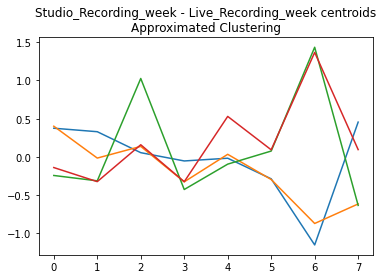

In [334]:
plot_centroids_approximated(cluster_centers_studio_live_paa, X_paa, album_type)

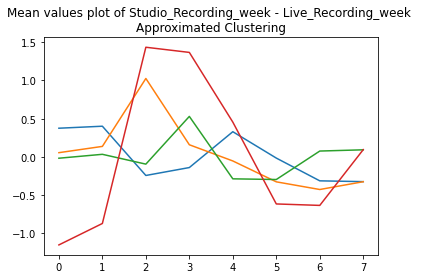

In [335]:
plot_mean_values_approximated(labels_studio_live_paa, X_paa, album_type)